🟢🟡🟠

# 1. Introduction to Machine Learning

## 1.1 Theory - Fields within AI

The term "Artificial Intelligence" (AI) has been initally used in 1959. Since then, many different algorithms and mathematical approaches have been labeles as AI, e.g. Artificial Neural Networks (ANN) during the 1960s. However, due to the lack of computational resources back then, the application mostly remained of theoretical nature. Developments described by [Moore's Law ](<https://de.wikipedia.org/wiki/Mooresches_Gesetz#:~:text=Das%20Mooresche%20Gesetz%20(englisch%20Moore's,24%20Monate%20als%20Zeitraum%20genannt.>) enabled first widespread applications in the late 2000s and early 2010s.

Since the breakthroughs for generative language models in 2022, AI has gained even more public attention and is seen as a major enabling technology. As the slide below is showing, AI is more than generative (language) foundation models. The term "foundation model" thereby indicates the general purpose nature of the models, which can be applied and fine-tuned for a multitude of use-cases.



## 1.2 Theory - Machine Learning as central area within AI

Machine Learning (ML) is a subset of AI that focuses on the development of algorithms and statistical models that enable computers to perform tasks without explicit instructions. Instead, these models learn from and make predictions or decisions based on data. Therefore, ML models are data-driven models, but not all data-driven models are built using ML.

### Machine Learning Models as Black Box Functions

Machine Learning models are often referred to as "black box" functions because their internal workings are not easily interpretable by humans. These models take input data and produce output predictions or decisions, but the exact process by which they arrive at these outputs can be complex and opaque. This lack of transparency can be a drawback in applications where understanding the decision-making process is crucial. However, the "black box" nature of these models does not diminish their effectiveness in tasks such as image recognition, natural language processing, and predictive analytics.

![image](./images/Bild1.png)


Machine learning is like teaching a computer to recognize patterns in data. Imagine showing a computer lots of examples of different things, like pictures of animals, sounds, or numbers. Over time, it learns the patterns that make each thing unique. Once trained, the computer can make decisions or predictions about new, unseen data.

Machine learning can work in different ways depending on the data. In **supervised learning**, you train the model using labeled examples (like telling it which pictures are of cats or dogs). It learns to associate inputs (like fur patterns, ear shapes) with the correct outputs (cat or dog). In **unsupervised learning**, the model looks for patterns on its own without labels. It might, for example, group similar pictures together based on shared features without knowing in advance what they represent. There's also **reinforcement learning**, where the model learns by trial and error, receiving feedback (rewards or penalties) as it tries to solve a problem.

- **Key Idea**:
Machine learning builds **models** that can learn from data, recognize patterns, and make predictions. It works across various types of data and learning methods, beyond just those with clear labels.


![image](./images/Bild2.png)

In [14]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output


##### Importing Tabular Data into a DataFrame

When working with machine learning models, tabular data is often organized in a structured format like CSV, Excel, or other file types. One of the most common ways to handle this data in Python is by using **Pandas**, a powerful library for data manipulation.


In [15]:
# read csv (comma separated value) into data
data = pd.read_csv('./input/column_2C_weka_industrial.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<a id="2"></a> <br>

## 1.3 Supervised Learning
* **Supervised learning**: In this type of learning, the model is trained on labeled data, where each input (features) has an associated output (target variable). 
    * For example, imagine data from orthopedic patients where the features might include variables like *pelvic radius* or *sacral slope*, and the target label could indicate whether the condition is *normal* or *abnormal*.
    * The goal is for the model to learn from this data, so given new input features, it can predict the correct target label.
  
* **Key tasks in supervised learning**:
    1. **Classification**: The target variable is categorical, meaning it belongs to a set of classes or categories. For example, the target might be *normal* or *abnormal* (binary classification), or it could be several categories like *low*, *medium*, or *high* (multi-class classification).
    2. **Regression**: The target variable is continuous and numerical. Instead of predicting a category, the goal is to predict a real value. For example, predicting a patient's recovery time (in days) based on their medical features.

The main difference:
- In **classification**, the output is a discrete category (e.g., normal or abnormal).
- In **regression**, the output is a continuous number (e.g., predicting a temperature or a price).


![image](./images/1_xs6Jr4iAPvoqszF9JgDWOA.png)

<a id="3"></a> <br>
### Exploratory Data Analysis (EDA)
* In order to make something in data, as you know you need to explore data.
* head(): default value of it shows first 5 rows(samples). If you want to see for example 100 rows just write head(100)


In [16]:
# to see features and target variable
data.head()

temperature  position_x  mean_clamping_force   slope_xy  flange_radius  \
0    63.027817   22.552586            39.609117  40.475232      98.672917   
1    39.056951   10.060991            25.015378  28.995960     114.405425   
2    68.832021   22.218482            50.092194  46.613539     105.985135   
3    69.297008   24.652878            44.311238  44.644130     101.868495   
4    49.712859    9.652075            28.317406  40.060784     108.168725   

   position_y class  
0   -0.254400    OK  
1    4.564259    OK  
2   -3.530317    OK  
3   11.211523    OK  
4    7.918501    OK

In [17]:
# Well know question is is there any NaN value and length of this data so lets look at .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          310 non-null    float64
 1   position_x           310 non-null    float64
 2   mean_clamping_force  310 non-null    float64
 3   slope_xy             310 non-null    float64
 4   flange_radius        310 non-null    float64
 5   position_y           310 non-null    float64
 6   class                310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


As you can see:
* The DataFrame has 310 rows (length: 310, range index).
* The features are of type `float`.
* The target variable is an `object`, which typically means it's a string or categorical data.

Now, let’s dive deeper into the data by using the `describe()` function:

* **`describe()`**: This function provides a summary of statistics for numerical columns in the DataFrame.
    * It returns useful statistics like:
        * **mean**: The average value of each feature.
        * **std**: The standard deviation, which measures how spread out the values are.
        * **min** and **max**: The minimum and maximum values, showing the range of the data.
        * **25%, 50%, 75%** (percentiles): These values give an idea of the distribution of the data.
    * Why do we need to see these statistics? To better understand the spread and distribution of our data. When visualizing or modeling the data, it helps if the values of features are on a similar scale. For instance, if one feature has values around 0.1 and another around 1000, this could cause problems with certain algorithms. In our case, it’s good that the values seem reasonably close to each other, as we don’t have any drastic outliers or incompatible scales. There are other reasons for checking these statistics, which will be explained in later sections.


In [18]:
data.describe()

temperature  position_x  mean_clamping_force    slope_xy  \
count   310.000000  310.000000           310.000000  310.000000   
mean     60.496653   17.542822            51.930930   42.953831   
std      17.236520   10.008330            18.554064   13.423102   
min      26.147921   -6.554948            14.000000   13.366931   
25%      46.430294   10.667069            37.000000   33.347122   
50%      58.691038   16.357689            49.562398   42.404912   
75%      72.877696   22.120395            63.000000   52.695888   
max     129.834041   49.431864           125.742385  121.429566   

       flange_radius  position_y  
count     310.000000  310.000000  
mean      117.920655   26.296694  
std        13.317377   37.559027  
min        70.082575  -11.058179  
25%       110.709196    1.603727  
50%       118.268178   11.767934  
75%       125.467674   41.287352  
max       163.071041  418.543082

pd.plotting.scatter_matrix:
* green: *normal* and red: *abnormal*
* c:  color
* figsize: figure size
* diagonal: histohram of each features
* alpha: opacity
* s: size of marker
* marker: marker type 

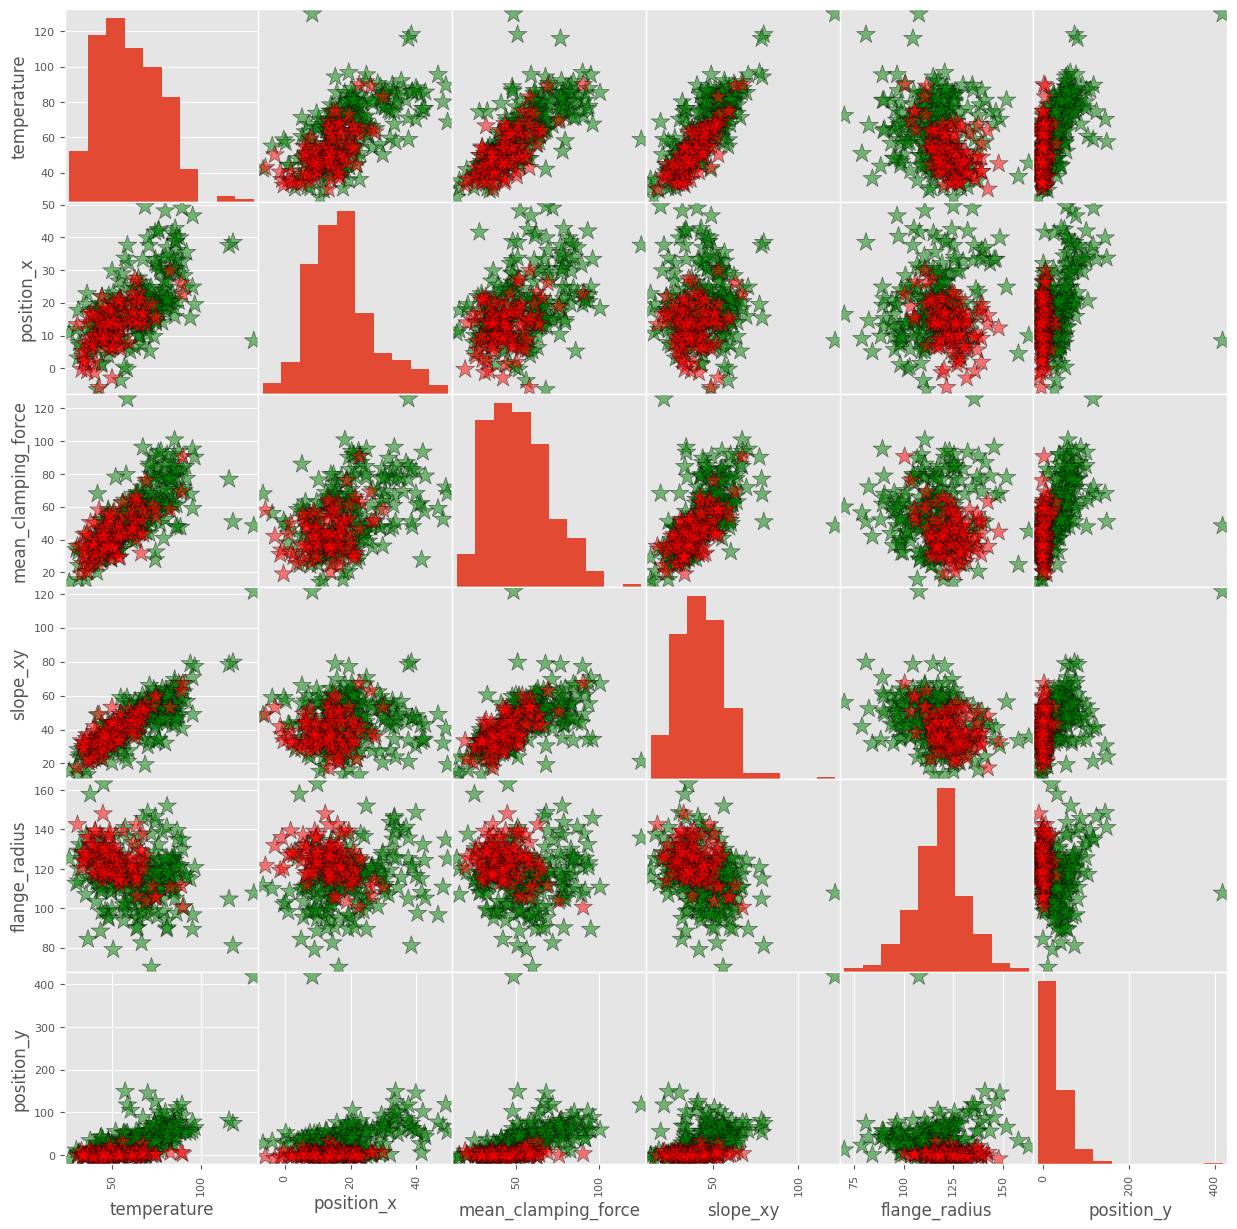

In [19]:
color_list = ['red' if i=='nOK' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolors= "black")
plt.show()


Alright, let’s dive into analyzing the classes and relationships within our dataset, as visualized in the scatter matrix. This view helps us understand how different features relate to one another, but first, let’s look at the number of *normal* (green) and *abnormal* (red) classes in the data.

### Counting Classes

To see the class distribution:
- The `Seaborn` library provides the `countplot()` function, which visually counts each class for us.
- Alternatively, you can use the `value_counts()` method to print the count of each class directly.

### Observing Feature Correlations

Looking closer at the scatter matrix, we notice some strong correlations between specific variables:
- **Temperature** and **Clamping Force**
- **Temperature** and **XY Slope**
- **Mean Clamping Force** and **XY Slope**

These relationships suggest that changes in one variable may impact another, which could be valuable information when building our model.

### Data Balance

This dataset appears balanced, meaning the classes are approximately equal in size. While there’s no strict numeric definition for what makes data “balanced,” this distribution is balanced enough for our purposes.

Especially regarding data balance, it's worth noting that, in a predictive quality context, data is often **strongly imbalanced**. This is because most production data contains a significantly higher proportion of "good" parts. In such cases, imbalanced data can affect model performance, making it harder to accurately detect or classify the less common "abnormal" instances.

### Next Steps: Classification with K-Nearest Neighbors (KNN)

Now that we understand our data’s structure and balance, let’s explore our first classification method: **K-Nearest Neighbors (KNN)**.


class
OK     210
nOK    100
Name: count, dtype: int64

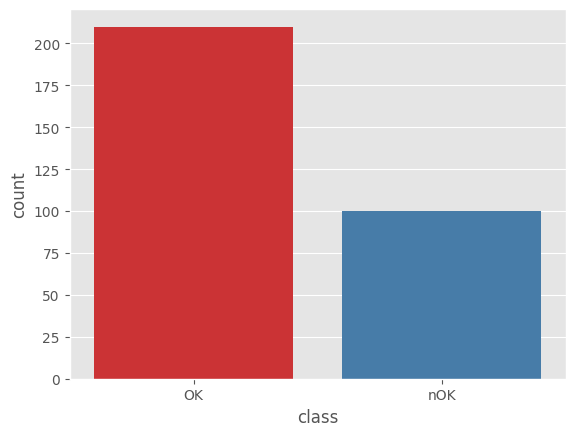

In [20]:
sns.countplot(x="class", data=data,palette = "Set1")
data.loc[:,'class'].value_counts()

### Classification

#### What is Classification?

Classification is a type of **supervised learning** where the goal is to predict the category or class of a given data point. The model learns from a **labeled dataset**, where each data point is associated with a specific class or category. After learning, the model can predict the class of new, unseen data points.

##### Example:
Imagine you have a dataset of emails labeled as either "spam" or "not spam." You train a classification model using this data. Once trained, the model can classify new emails as either spam or not spam based on the features of the email (like words used, sender, etc.).

##### Types of Classification:
- **Binary Classification:** The model predicts one of two possible classes (e.g., spam or not spam).
- **Multi-class Classification:** The model predicts one of many possible classes (e.g., classifying a fruit as apple, banana, or orange).
- **Multi-label Classification:** The model predicts multiple labels for a single instance (e.g., an image may contain both "cat" and "dog" labels).

---

#### Metrics for Evaluating Classification Models

Once a classification model is trained, we need to evaluate its performance. There are several metrics used to measure the effectiveness of a classification model:

##### 1. **Confusion Matrix**
The confusion matrix provides a complete picture of how the classification model is performing. It shows the counts of:
- **True Positives (TP):** Correctly predicted positive cases
- **True Negatives (TN):** Correctly predicted negative cases
- **False Positives (FP):** Incorrectly predicted as positive (Type I Error)
- **False Negatives (FN):** Incorrectly predicted as negative (Type II Error)

|                    | Predicted Positive | Predicted Negative |
|--------------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN)|
| **Actual Negative** | False Positive (FP)| True Negative (TN) |

##### 2. **Accuracy**
Accuracy is the proportion of correctly predicted data points out of the total number of data points.
- **Formula:**  
  $$
  \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
  $$
  
  - **Example:** If a model correctly classifies 90 out of 100 emails, the accuracy is 90%.

##### 3. **Precision**
Precision measures the proportion of correctly predicted positive observations out of the total predicted positive observations. It answers the question, "Of all the instances that were classified as positive, how many are actually positive?"
- **Formula:**  
  $$
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  $$
  
  - **Example:** If the model says 10 emails are spam, but only 7 are actually spam, precision is 70%.

##### 4. **Recall (Sensitivity or True Positive Rate)**
Recall measures the proportion of actual positive cases that the model correctly identified. It answers the question, "Of all the positive instances, how many did the model catch?"
- **Formula:**  
  $$
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  $$
  
  - **Example:** If there are 20 actual spam emails and the model identifies 15 of them as spam, recall is 75%.

##### 5. **F1-Score**
The F1-Score is the harmonic mean of precision and recall, providing a balance between the two. It’s useful when you want to balance precision and recall.
- **Formula:**  
  $$
  \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
  
  - **Example:** If precision is 70% and recall is 80%, the F1-Score is 74%.



##### 6. **AUC-ROC Curve**
The **Receiver Operating Characteristic (ROC) curve** is a graphical representation of the model's performance across different classification thresholds. The **Area Under the Curve (AUC)** quantifies the overall ability of the model to discriminate between positive and negative classes.
- **AUC-ROC Score:** A value between 0 and 1, where a higher score means better performance.

---

#### Understanding Classification Thresholds

A **classification threshold** determines the cutoff value at which a data point is assigned to a specific class. For example, in binary classification, the default threshold is typically 0.5: if the model predicts a probability above 0.5, the data point is classified as positive; if below 0.5, it’s classified as negative.

- **Adjusting the Threshold**: Adjusting the threshold can help control the balance between precision and recall:
  - Lowering the threshold increases recall but may lower precision, meaning the model is more lenient and catches more positives, including some false positives.
  - Raising the threshold increases precision but may lower recall, making the model stricter and reducing false positives but potentially missing true positives.

Threshold adjustments are essential for achieving the desired balance based on the specific goals and requirements of your classification problem.

By using these metrics and understanding the classification threshold, you can better evaluate and refine your classification model’s performance.


<a id="4"></a> <br>

#### K-Nearest Neighbors (KNN)

K-Nearest Neighbors (**KNN**) is a simple, yet powerful **classification method**. It works by looking at the K closest labeled data points and assigning the most common class among them to the new data point.

##### Key Concepts:
- **KNN**: Looks at the K closest labeled data points to make predictions.
- **Classification Method**: Primarily used for classification tasks but can also be used for regression.
- **Train the Model**: Before using the model to predict, we need to train (or fit) it with data.

##### Basic Workflow in KNN:
1. **fit()**: This function is used to train the model. It "fits" the training data to the model.
2. **predict()**: After training the model, this function is used to predict the class of new, unseen data.

##### Scikit-learn (Sklearn)

**[Scikit-learn](https://scikit-learn.org/stable/)**, commonly known as **Sklearn**, is a popular library for machine learning in Python, widely used for its efficient and easy-to-use tools for data analysis and modeling. It offers comprehensive support for data preprocessing, supervised and unsupervised learning algorithms, and model evaluation metrics.

Sklearn is especially well-suited for tabular data and serves as an excellent choice for quick model prototyping. We’ll use Sklearn later to implement our K-Nearest Neighbors (KNN) model.

##### Example with `sklearn`:
Let’s learn how to implement KNN using `sklearn`:

- `X`: Features or input variables.
- `y`: Target variable (e.g., "nOK", "OK").
- `n_neighbors`: This is the value of K. For example, setting `n_neighbors=3` means that the algorithm will look at the 3 closest labeled data points.



In [8]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['OK' 'OK' 'OK' 'OK' 'OK' 'nOK' 'nOK' 'OK' 'nOK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'nOK' 'nOK' 'nOK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'nOK' 'OK' 'nOK' 'nOK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'nOK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'nOK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'nOK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'O

#### Evaluating Model Performance: Accuracy and Beyond

Once we’ve fit the data and made predictions using KNN, the next step is to evaluate how well our model is performing. The most common way to do this is by calculating **accuracy**, which measures the fraction of correct predictions. However, is accuracy always the best metric? Let’s dive into this question.

##### Key Points to Consider:
- **Accuracy**: This metric tells us the fraction of correct predictions made by the model. While it’s widely used, it might not always give the full picture of model performance, especially with imbalanced datasets.
  
##### The Absurdity of Overfitting:
In the previous step, we trained the model using all the data and then predicted on the same data. This is absurd because the model has already seen the data it’s predicting! This leads to overfitting, where the model performs well on the training data but fails on new, unseen data.

##### Solution: Train-Test Split
To avoid this, we need to **split the data** into two separate sets:
1. **Training Set**: Used to train the model (fit the data).
2. **Test Set**: Used to evaluate the model’s performance by making predictions on data it hasn’t seen before.

This ensures that the model is tested on unseen data, making the evaluation more reliable.

##### How to Split the Data in Python:
The `train_test_split()` function from `sklearn` helps us split the data:

In [9]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(X_test,y_test)) # accuracy


With KNN (K=3) accuracy is:  0.8602150537634409


The model's accuracy is currently 86%. Is this good? It's hard to say just yet; we’ll evaluate it further at the end of this tutorial.

### Choosing the Value of K in KNN: Model Complexity

A key question arises: why did we initially choose K = 3, and how do we determine the best value for K? This choice is tied to **model complexity**.

#### Model Complexity
- **K as a Hyperparameter**: In KNN, K is a **hyperparameter**, a value that we set before training the model. Selecting an optimal K value is essential to maximize model performance.
- **Small K Values**: A small K value makes the model more complex, which can lead to **overfitting**. This means the model may "memorize" the training data but struggle to generalize well to new, unseen data.
- **Large K Values**: A larger K value makes the model less complex, potentially leading to **underfitting** if the model cannot capture enough of the underlying patterns in the data.

To demonstrate, we range the K value from 1 to 24 and calculate accuracy for each. In the plot below, you’ll see that when K is 1, the model overfits, memorizing the training data but performing poorly on the test data. At K = 18, we see underfitting as the model is too simplistic. However, around K = 8 (our optimal value), the model achieves its highest accuracy at almost 88%.


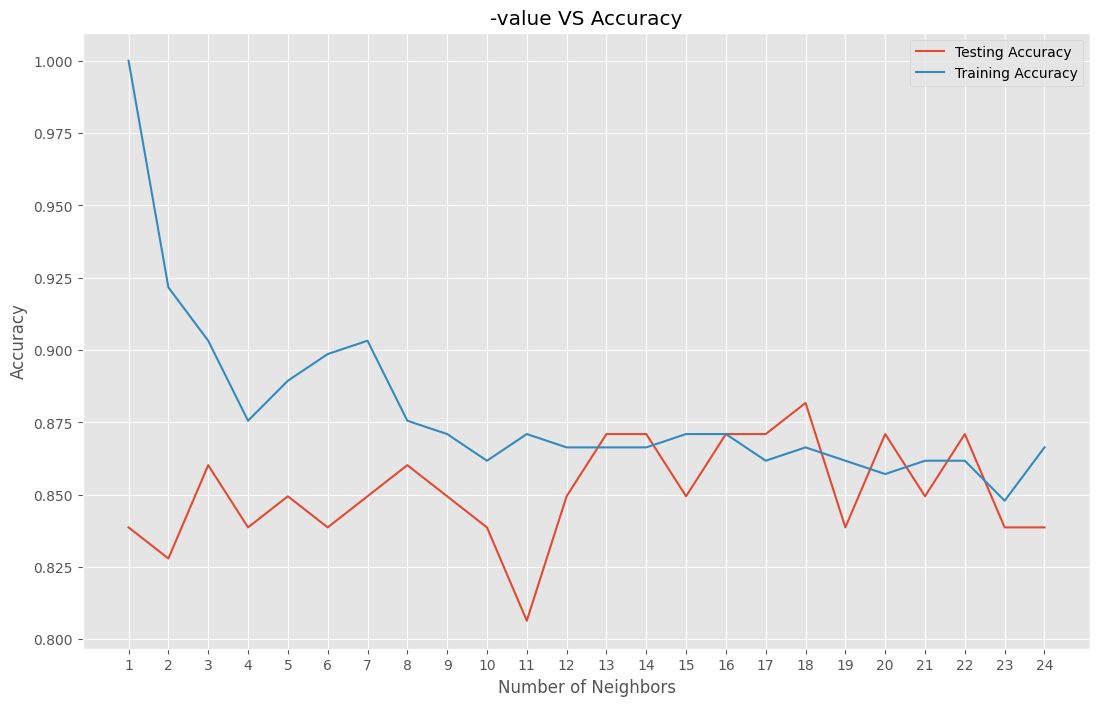

Best accuracy is 0.8817204301075269 with K = 18


In [10]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

### Key Takeaways So Far:
* **Supervised Learning**
* **Exploratory Data Analysis**
* **K-Nearest Neighbors (KNN)**
    * How to split data for training and testing
    * How to fit and predict data
    * How to measure model performance (accuracy)
    * How to select a hyperparameter (K)

**What if we replace KNN with another classification technique, such as Random Forest?**

The answer is, **not much changes**. To switch to Random Forest, you only need a basic understanding of how it works and can easily find resources on platforms like YouTube to get started. Most of the approach remains the same, with only the classifier itself changing (from `KNeighborsClassifier` to `RandomForestClassifier`). The process of splitting, fitting, predicting, evaluating performance, and selecting hyperparameters (such as `max_depth` in Random Forest) will be very similar.


<a id="5"></a> <br>
### Regression

Regression is a type of **supervised learning** aimed at predicting a continuous output variable based on one or more input features. Unlike classification, where the output is categorical, regression focuses on predicting numerical values. Common regression models include **linear regression**, **logistic regression** (which, despite its name, is used for classification), **polynomial regression**, and more complex models like **ridge regression**, **lasso regression**, and **support vector regression (SVR)**.

In this section, we will focus on **linear regression**, a foundational model that seeks to find a linear relationship between the input features and the output target.

#### Linear Regression
Linear regression assumes a linear relationship between the input features (X) and the output variable (Y). The target variable \( Y \) is modeled as a weighted sum of the input features plus a bias term:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon
$$

Where:

- \( $\beta_0$ \) is the intercept (bias term)
- \( $\beta_1, \beta_2, \dots, \beta_n$ \) are the coefficients (weights) associated with each feature
- \( $\epsilon$ \) represents the error term (residuals)

For our example, we will use two features from the Industrial dataset: `temperature` (as the feature) and `slope_xy` (as the target). 

Before fitting a regression model, it is helpful to **visualize the relationship** between the two variables with a **scatter plot** to gain a better understanding of the data.


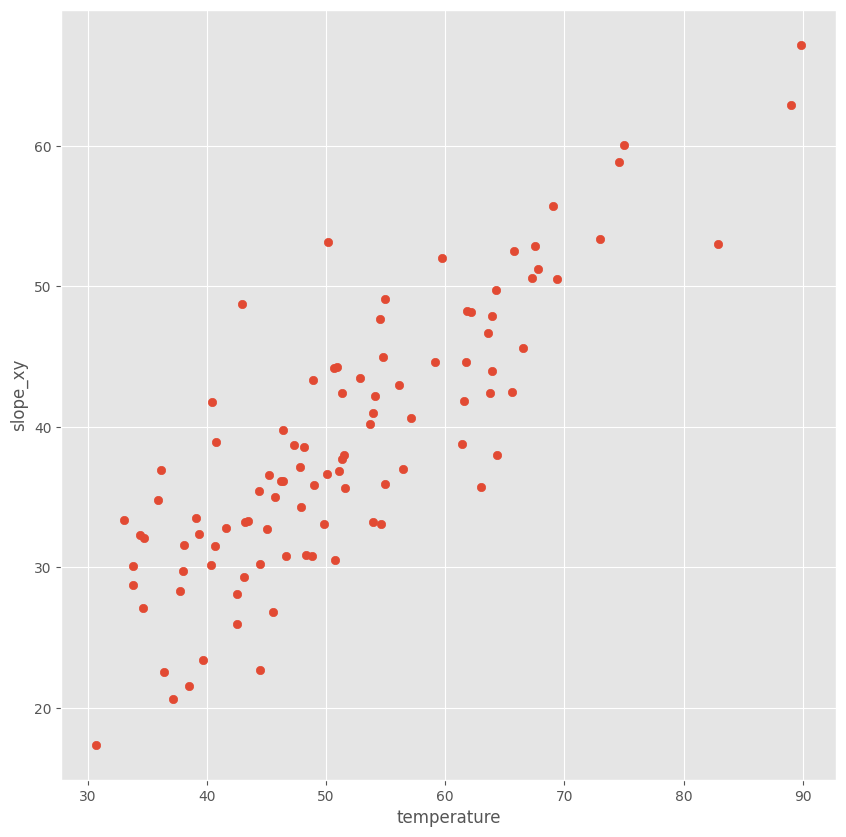

In [11]:
# create data_nOK that includes temperature that is feature and slope_xy as target variable
data_nOK = data[data['class'] =='nOK']
x = np.array(data_nOK.loc[:,'temperature']).reshape(-1,1)
y = np.array(data_nOK.loc[:,'slope_xy']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('temperature')
plt.ylabel('slope_xy')
plt.show()

Now we have our data to make regression. In regression problems target value is continuously varying variable such as price of house or sacral_slope. Lets fit line into this points.

<br> Linear regression
* $y = ax + b$       where  y = target, x = feature and a = parameter of model
* We choose parameter of model(a) according to minimum error function that is lost function
* In linear regression we use Ordinary Least Square (OLS) as lost function.
* OLS: sum all residuals but some positive and negative residuals can cancel each other so we sum of square of residuals. It is called OLS
* Score: Score uses $R^2$ method that is $((y_{pred} - y_{mean}^2 )/(y_{actual} - y_{mean}^2))$

R^2 score:  0.7032892655693301


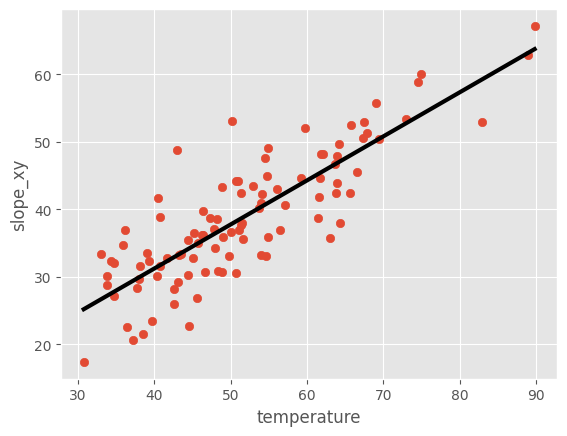

In [12]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)

# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('temperature')
plt.ylabel('slope_xy')
plt.show()

An \( $R^2$ \) score of 0.65 in regression indicates that 65\% of the variance in the target variable can be explained by the model’s input features. This score suggests a moderate level of fit, where the model captures a fair amount of the data’s underlying patterns but leaves room for improvement. Whether this is “good” depends on the specific context and goals; for instance, in some fields where data is inherently noisy, 0.65 could be acceptable, while in others, like engineering, a higher \( $R^2$ \) might be preferred. 

Just as classification models use accuracy, precision, and recall, regression models can benefit from a more detailed evaluation using metrics such as **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)** alongside \( $R^2$ \). It might be useful to introduce a dedicated subchapter on regression metrics to assess model performance comprehensively, similar to the metrics used in classification analysis.


<a id="6"></a> <br>
#### Cross Validation
As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.
<br> Cross Validation (CV)
* K folds = K fold CV.
* Look at this image it defines better than me :)
* When K is increase, computationally cost is increase
* cross_val_score(reg,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)


In [13]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

# Calculate and print standard deviation of CV scores
print('CV Scores Standard Deviation:', np.std(cv_result))

CV Scores:  [0.74847989 0.6469517  0.47230159 0.73941948 0.68406608]
CV scores average:  0.6582437488187519
CV Scores Standard Deviation: 0.10010080015184523


Cross-validation is typically used when we have a **limited amount of training samples** or when we want to ensure that the **feature distribution** of both the training and test sets represents the general distribution of the data. By dividing the dataset into multiple folds and training on different subsets, cross-validation provides a more robust assessment of the model's performance and helps reduce overfitting, especially when data is scarce.

Additionally, calculating the **standard deviation** alongside the average score of cross-validation results provides insight into the model's stability. A low standard deviation indicates that the model performs consistently across different folds, while a high standard deviation suggests variability in performance, which might indicate overfitting or sensitivity to data splits.


#### Regularized Regression

In linear regression, the model chooses parameters (coefficients) while minimizing the loss function. If linear regression identifies a feature as important, it assigns a high coefficient to that feature, which can lead to overfitting—a situation similar to memorization in KNN. To prevent overfitting, regularization techniques are used to penalize large coefficients.

#### Ridge Regression (L2 Regularization)
- **Ridge regression loss function** = OLS (Ordinary Least Squares) + alpha * sum(parameter²)
- Alpha is the hyperparameter that needs to be chosen for the best balance between model complexity and accuracy.
- **Choosing Alpha**: Similar to picking K in KNN, alpha controls the regularization strength.
    - If **alpha = 0**, it results in the regular linear regression model.
    - If **alpha is too small**, it can lead to overfitting.
    - If **alpha is too large**, it can cause underfitting. The range of what is considered small or large depends on the specific problem.

![image-2.png](./images/eq1.jpg)
  
#### Lasso Regression (L1 Regularization)
- **Lasso regression loss function** = OLS + alpha * sum(absolute_value(parameter))
- Lasso can be used for feature selection since it tends to shrink the coefficients of less important features to zero.
- This makes Lasso particularly useful for selecting the most important features in the data.


![image.png](./images/eq2.jpg)

#### Linear vs Ridge vs Lasso
- **First Impression**: Linear Regression
- **Feature Selection**: 1. Lasso, 2. Ridge
- **Regression Model**: 1. Ridge, 2. Lasso, 3. Linear


In [14]:
# Ridge
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)
ridge_predict = ridge.predict(X_test)
print('Ridge score: ',ridge.score(X_test,y_test))

Ridge score:  0.8235545613058709


Another reason why randomizing the train-test split is important in machine learning to ensure that the model's performance is evaluated on a representative sample of data. Randomization helps mitigate bias that can arise from systematic patterns within the dataset, leading to more reliable performance metrics. A random seed is a critical component in this process, serving as an initial value for the random number generator used during the split. By setting a specific random seed, we can ensure the reproducibility of results, allowing us to consistently obtain the same train-test split across different runs. This is particularly valuable in research and experimentation, as it enables comparison of model performance under identical conditions.


In [15]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data_nOK.loc[:,['temperature','position_x','mean_clamping_force','flange_radius']])
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
ridge_predict = lasso.predict(X_test)
print('Lasso score: ',lasso.score(X_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9999786838536439
Lasso coefficients:  [ 9.96917055e-01 -9.93506187e-01  5.02298409e-04 -0.00000000e+00]


As you can see, *temperature* and *position_x* are important features, while others are not as significant.

Now, let's discuss accuracy. Is accuracy alone sufficient for model evaluation? Consider a dataset with 95% OK and 5% nOK samples. If our model only uses accuracy as a metric, it could predict 100% of the samples as normal and still achieve a 95% accuracy. However, this would mean that all abnormal samples are misclassified, which is a significant issue. This is why accuracy is not a reliable metric for imbalanced datasets.

In such cases, we should use a **confusion matrix** to better evaluate model performance. The confusion matrix provides a more detailed view of true positives, false positives, true negatives, and false negatives, offering insights into how well the model is performing across different classes.

Before applying our **Random Forest Classifier**, it's important to understand tree-based models. Tree-based models, such as decision trees and ensemble methods like random forests, partition the data into subsets based on feature values, creating a tree-like structure for decision-making. These models are highly interpretable and can handle both categorical and continuous data. Random forests improve upon decision trees by aggregating the predictions of multiple trees, which reduces the risk of overfitting and enhances overall model performance. Let’s apply a Random Forest Classifier to diversify our classification methods and see how it performs with a confusion matrix.


In [16]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

          OK       0.88      0.91      0.90        66
         nOK       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



In classification model evaluation, terms like **macro average**, **weighted average**, and **support** are often used to summarize performance metrics, especially when working with multiple classes.

- **Macro Average**: This refers to the unweighted mean of a metric (such as precision, recall, or F1-score) across all classes. It treats each class equally, calculating the metric independently for each class and then taking the average. Macro averaging is useful when each class should have equal importance in the evaluation, regardless of its frequency in the dataset.

- **Weighted Average**: This is a mean of a metric across all classes, but it is weighted by the number of instances in each class. Weighted averaging accounts for class imbalance by giving more influence to classes with more samples, which is helpful when class distribution varies widely and you want to reflect overall performance more accurately.

- **Support**: Support represents the number of actual occurrences of each class in the dataset. It provides context for evaluating the reliability of metrics, as scores for classes with higher support are generally more reliable. 

In summary, macro and weighted averages are two ways of aggregating metrics across classes, while support indicates the frequency of each class.


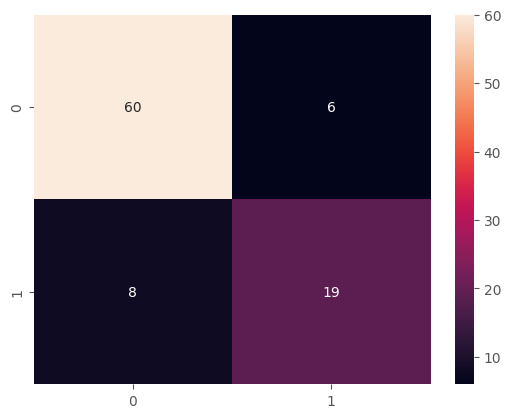

In [17]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

Here 0 is OK and 1 is nOK

#### ROC Curve with Logistic Regression

The ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a classification model, specifically logistic regression in this context. Logistic regression outputs probabilities, which are used to classify data points. By default, if the predicted probability exceeds 0.5, the data point is classified as 1 (abnormal), otherwise, it is classified as 0 (normal).

- **Threshold**: Logistic regression uses a default threshold of 0.5 for classification. However, in ROC analysis, you change the threshold within the range of `[0, 1]` to observe how different thresholds affect the model's performance.
- **ROC Curve**: The ROC curve plots the trade-off between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)** across different thresholds. The TPR is the proportion of actual positives that are correctly identified, while the FPR is the proportion of actual negatives that are incorrectly classified as positive.

- **Interpretation**: A model is considered more accurate if its ROC curve is closer to the top-left corner of the plot, indicating a higher TPR and lower FPR.
- **AUC (Area Under the Curve)**: The AUC score represents the area under the ROC curve. An AUC score closer to 1 indicates a better-performing model.

The objective in ROC analysis is to maximize the AUC, as it measures the overall ability of the model to distinguish between positive and negative classes.

- **Key Definitions**:
  - **TPR (True Positive Rate)**: The proportion of actual positives correctly identified by the model.
  - **FPR (False Positive Rate)**: The proportion of actual negatives incorrectly identified as positives.

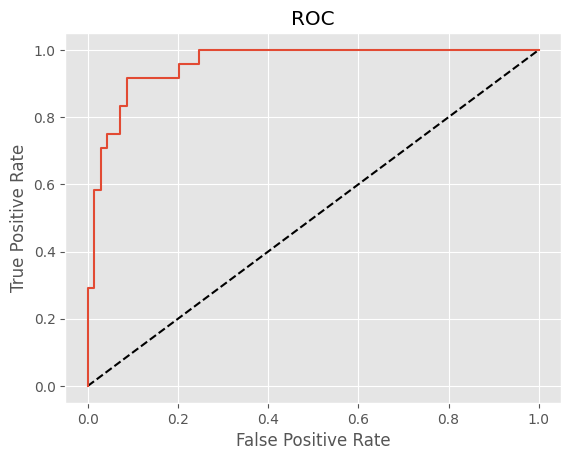

In [18]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'nOK' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


<a id="8"></a> <br>
### Hyperparameter Tuning: A Brief Overview

Hyperparameter tuning is an essential aspect of optimizing machine learning models. In this process, we adjust model parameters that are not learned directly from the data, but are set before training begins, in order to enhance model performance. 

Some examples of hyperparameters include:
- **k** in K-Nearest Neighbors (KNN)
- **alpha** in Ridge and Lasso regression
- Parameters like **max_depth** in Random Forests
- **Coefficients** in linear regression models

**Hyperparameter Tuning Process**:
- Evaluate combinations of different hyperparameters
- Fit models using these combinations
- Measure prediction performance for each configuration
- Select the best-performing set of hyperparameters

While this may sound complex (and in some cases, laborious), tools like `GridSearchCV` simplify the process significantly by automating the search for the optimal hyperparameters. For instance:
- In a KNN model, `GridSearchCV` can automatically search for the optimal **k** value between a defined range, say 1 to 49.

This is just a quick touch on hyperparameter tuning. More details, including advanced methods and examples, will be provided later in this tutorial.



In [19]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


Tuned hyperparameter k: {'n_neighbors': np.int64(3)}
Best score: 0.7461725168035848


Other grid search example with 2 hyperparameter
* First hyperparameter is C:logistic regression regularization parameter
    * If C is high: overfit
    * If C is low: underfit
* Second hyperparameter is penalty(lost function): l1 (Lasso) or l2(Ridge) as we learnt at linear regression part.

In [20]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))


Tuned hyperparameters : {'C': np.float64(0.001), 'penalty': 'l2'}
Best Accuracy: 0.8572425164890919


When using **GridSearchCV** in Python to optimize hyperparameters, you can define a *search space* that specifies the range of values to explore for each hyperparameter. The search space essentially provides a set of possible values for **GridSearchCV** to test systematically.

In some cases, using values that span orders of magnitude, such as for regularization parameters or learning rates, is ideal. This is where `np.logspace` comes in. **`np.logspace`** generates numbers spaced evenly on a logarithmic scale, making it ideal for creating ranges for hyperparameters like regularization strengths (`alpha`, `C`, etc.) that require exponential scaling. For example, you might want to search between \(0.001\) and \(1000\) using `np.logspace`, which gives values at exponentially increasing intervals.

By using `np.logspace` in **GridSearchCV**, you can efficiently search through a wide range of values, especially for parameters that scale better on a logarithmic scale.



<a id="9"></a> <br>
### Pre-Processing Data
* In real life data can include objects or categorical data in order to use them in modelling (e.g. using sklearn) we need to encode them into numerical data
* In our dataset, the classes are *nOK* and *OK*. Lets convert them into numeric values (actually I did it in logistic regression part with different method)
* 2 different feature is created with the name *class_nOK* and *class_OK*
* However we need to drop one of the column because they are duplicated

### Why Do We Conduct Preprocessing Steps?

Preprocessing steps are essential in data analysis and machine learning for several reasons:

1. **Data Quality Improvement**: Preprocessing helps in cleaning the data by handling missing values, removing duplicates, and correcting inconsistencies. This ensures that the model trains on high-quality data, leading to better performance.

2. **Feature Scaling**: Many machine learning algorithms are sensitive to the scale of the input features. Preprocessing includes techniques like normalization and standardization to bring all features into a similar scale, improving convergence during training.

3. **Encoding Categorical Variables**: Machine learning models typically require numerical input. Preprocessing involves encoding categorical variables (e.g., using one-hot encoding) so that these models can interpret the data correctly.

4. **Dimensionality Reduction**: High-dimensional data can lead to overfitting and increased computational costs. Preprocessing steps like Principal Component Analysis (PCA) can reduce the number of features while retaining important information.

5. **Outlier Detection and Treatment**: Identifying and handling outliers is a crucial preprocessing step, as outliers can skew the results of the model and impact its performance.

6. **Improved Model Interpretability**: By preprocessing the data appropriately, the results become more interpretable, allowing for better insights and understanding of the underlying patterns.

In summary, preprocessing is a vital part of the data science workflow that enhances the quality of the data, improves model performance, and ensures that the results are reliable and interpretable.


In [21]:
# Load data
data = pd.read_csv('./input/column_2C_weka_industrial.csv')
# get_dummies
df = pd.get_dummies(data)
df.head(10)

temperature  position_x  mean_clamping_force   slope_xy  flange_radius  \
0    63.027817   22.552586            39.609117  40.475232      98.672917   
1    39.056951   10.060991            25.015378  28.995960     114.405425   
2    68.832021   22.218482            50.092194  46.613539     105.985135   
3    69.297008   24.652878            44.311238  44.644130     101.868495   
4    49.712859    9.652075            28.317406  40.060784     108.168725   
5    40.250200   13.921907            25.124950  26.328293     130.327871   
6    53.432928   15.864336            37.165934  37.568592     120.567523   
7    45.366754   10.755611            29.038349  34.611142     117.270067   
8    43.790190   13.533753            42.690814  30.256437     125.002893   
9    36.686353    5.010884            41.948751  31.675469      84.241415   

   position_y  class_OK  class_nOK  
0   -0.254400      True      False  
1    4.564259      True      False  
2   -3.530317      True      False  
3   11.211523      True      False  
4    7.918501      True      False  
5    2.230652      True      False  
6    5.988551      True      False  
7  -10.675871      True      False  
8   13.289018      True      False  
9    0.664437      True      False

In [22]:
# drop one of the classes
df.drop("class_OK",axis = 1, inplace = True) 
df.head(10)
# instead of two steps we can make it with one step pd.get_dummies(data,drop_first = True)

temperature  position_x  mean_clamping_force   slope_xy  flange_radius  \
0    63.027817   22.552586            39.609117  40.475232      98.672917   
1    39.056951   10.060991            25.015378  28.995960     114.405425   
2    68.832021   22.218482            50.092194  46.613539     105.985135   
3    69.297008   24.652878            44.311238  44.644130     101.868495   
4    49.712859    9.652075            28.317406  40.060784     108.168725   
5    40.250200   13.921907            25.124950  26.328293     130.327871   
6    53.432928   15.864336            37.165934  37.568592     120.567523   
7    45.366754   10.755611            29.038349  34.611142     117.270067   
8    43.790190   13.533753            42.690814  30.256437     125.002893   
9    36.686353    5.010884            41.948751  31.675469      84.241415   

   position_y  class_nOK  
0   -0.254400      False  
1    4.564259      False  
2   -3.530317      False  
3   11.211523      False  
4    7.918501      False  
5    2.230652      False  
6    5.988551      False  
7  -10.675871      False  
8   13.289018      False  
9    0.664437      False

#### Preprocessing: Centering, Scaling, or Normalizing

Another important preprocessing step is **centering, scaling, or normalizing** the data.

- **Why Scaling is Important**: 
    - Methods like **K-Nearest Neighbors (KNN)** and other distance-based algorithms rely on a form of distance for classification. Therefore, it is essential to scale the data before applying these algorithms.
    - Common scaling methods include:
        - **Standardization**: $(x - x_{mean}) / x_{variance}$
        - **Normalization**: $(x - x_{min}) / x_{range}$

- **Pipeline**:
    - A **pipeline** is used to combine multiple steps, such as a classifier (e.g., Support Vector Machine or SVM) and preprocessing (e.g., standardization).
    - Pipelines help streamline the workflow by applying these steps sequentially.

- **Parameter Naming**:
    - Parameters in pipelines follow the format: `stepName__parameterName`. For example, the regularization parameter \(C\) in an SVM step would be referred to as `SVM__C`.

- **Grid Search**:
    - To find the optimal parameters for a model, a **grid search** is typically used, allowing for hyperparameter tuning and selection of the best-performing model.


In [23]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(X_train,y_train)

y_pred = cv.predict(X_test)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


<a id="10"></a> <br>
## 1.4 Unsupervised Learning
* **Unsupervised learning** works with data that does **not have labeled outputs**, aiming to uncover hidden patterns or structures in the data. Unlike supervised learning, where the goal is to predict a known outcome, unsupervised learning seeks to find natural groupings or reduce dimensionality in the data.
* Example: Imagine you have orthopedic patient data, but the labels (normal or abnormal) are missing. The task is to analyze the features of the patients and group similar ones together without prior knowledge of their condition.
* There are two ways of doing this:

### Clustering

Clustering is a core technique in unsupervised learning, used to discover natural groupings within data without requiring labeled outcomes. It is particularly valuable for identifying patterns or segments in a dataset, where each group, or "cluster," contains similar data points based on predefined similarity measures. For instance, clustering can reveal meaningful customer segments based on purchasing behavior or group images by visual similarity in image segmentation tasks.

Clustering is also closely related to **anomaly detection**. In anomaly detection, clustering can help identify unusual data points by flagging points that do not belong to any cluster or appear distant from cluster centroids. This relationship between clustering and anomaly detection is particularly useful in applications where identifying deviations from normal patterns is essential.


### Anomaly Detection

Anomaly detection is the process of identifying unusual data points that deviate significantly from the norm within a dataset. In unsupervised learning, this technique is essential for applications such as fraud detection, network security, and fault detection, where anomalies could indicate significant issues or opportunities. Anomaly detection algorithms do not require labeled training data; instead, they learn the typical patterns and behaviors in the dataset and flag instances that do not conform to these patterns. Common methods include statistical techniques, clustering approaches (like k-means), and machine learning algorithms like autoencoders.

### Dimentionality Reduction

Dimensionality reduction is another crucial technique in unsupervised learning that aims to reduce the number of input variables in a dataset while preserving essential information. This is particularly useful when dealing with high-dimensional data, which can be computationally intensive and may lead to the "curse of dimensionality." Techniques such as Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) are commonly used for dimensionality reduction. PCA transforms the data into a lower-dimensional space by identifying the directions (principal components) that capture the most variance in the data. In contrast, t-SNE focuses on maintaining the relationships between data points in a lower-dimensional space, making it particularly effective for visualizing complex datasets. By reducing dimensionality, these techniques help improve the performance of machine learning models and facilitate better data visualization.

![image](./images/dim.jpg)

### 1.4.1 K-Means Clustering
**K-Means** is a simple yet powerful clustering algorithm that works by dividing data into *K* number of clusters, grouping similar data points together. Here's how it works:

1. **Step 1**: Choose the number of clusters, K.
2. **Step 2**: Randomly initialize the cluster centroids (the center points of each cluster).
3. **Step 3**: Assign each data point to the nearest centroid based on the distance.
4. **Step 4**: Recalculate the centroids by taking the mean of all data points assigned to each cluster.
5. **Step 5**: Repeat steps 3 and 4 until the centroids no longer move significantly, indicating that the clusters are stable.



<a id="11"></a> <br>
#### Implementation
* Lets try our first unsupervised method that is KMeans Cluster
* KMeans Cluster: The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity
* KMeans(n_clusters = 2): n_clusters = 2 means that create 2 cluster

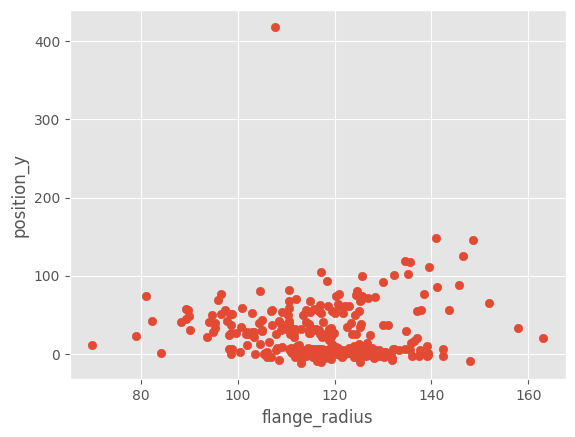

In [24]:
# As you can see there is no labels in data
plt.scatter(data['flange_radius'],data['position_y'])
plt.xlabel('flange_radius')
plt.ylabel('position_y')
plt.show()

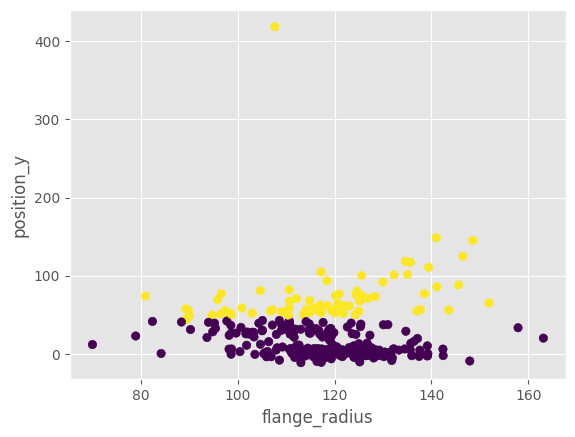

In [25]:
# KMeans Clustering
data2 = data.loc[:,['position_y','flange_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data2['flange_radius'],data2['position_y'],c = labels)
plt.xlabel('flange_radius')
plt.ylabel('position_y')
plt.show()

### 1.4.2 Anomaly detection

Here `yellow` represents one group (labeled `0`) and `purple` another (labeled `1`). Notably, there is a distinct data point with a `position_y` value greater than `400` that stands out from all other points. This unique separation is referred to as an "anomaly among the anomalies." It suggests that even within groups of anomalous data, certain points can be outliers, representing patterns or behaviors that diverge significantly, not only from the general data distribution but also from other anomalies. Identifying such "super anomalies" can be critical for understanding extreme cases in data.


<a id="12"></a> <br>
#### Evaluation of Clustering
We cluster data in two groups. Okey well is that correct clustering? In order to evaluate clustering we will use cross tabulation table.
* There are two clusters that are *0* and *1* 
* First class *0* includes 138 abnormal and 100 normal patients
* Second class *1* includes 72 abnormal and 0 normal patiens
*The majority of two clusters are abnormal patients.

In [26]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
# print(ct)

##### Determining the Optimal Number of Clusters

When working with clustering algorithms, one common challenge is determining the optimal number of clusters, especially when the number of clusters is unknown. This is analogous to selecting hyperparameters in models like KNN or regression.

One key metric in clustering is **inertia**, which measures how spread out the data points are within each cluster. Specifically, inertia is the sum of the squared distances between each data point and its closest cluster center.

- **Lower inertia**: Indicates that the data points are closely packed within their respective clusters.
- **More clusters**: Typically result in lower inertia, as more groups allow for tighter clustering.

##### Choosing the Optimal Number of Clusters
To find the best number of clusters, there is a trade-off to consider:
- More clusters lead to lower inertia but might result in overfitting.
- Fewer clusters might increase inertia but offer a more generalized solution.

One common method to address this trade-off is the **Elbow Method**. The idea is to plot the inertia for different numbers of clusters and look for an "elbow" point, where the inertia starts decreasing more slowly. This point indicates a good balance between inertia reduction and the number of clusters.

This is a quick overview; more in-depth explanations and techniques will be explored later in the tutorial.


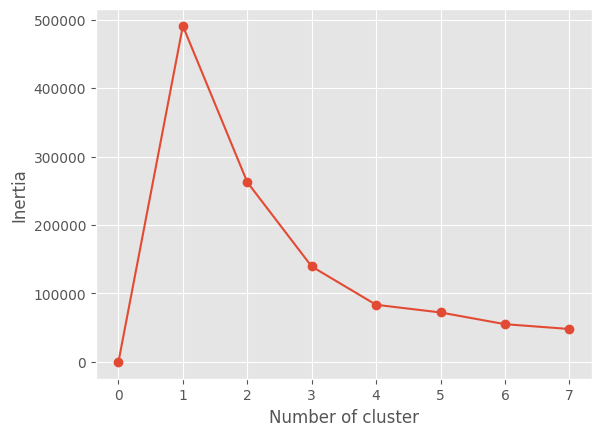

In [27]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

### 1.4.3 Dimensionality Reduction

In unsupervised learning and anomaly detection, dimensionality reduction plays a crucial role in simplifying high-dimensional data while retaining as much information as possible. This step is essential to improve model efficiency and interpretability. Key techniques like **Standardization**, **scipy.cluster.hierarchy**, **t-SNE**, and **PCA** are vital for transforming and analyzing data.

- **Standardization** ensures that features are scaled consistently, which is critical when using algorithms sensitive to the magnitude of features.
- **scipy.cluster.hierarchy** helps in hierarchical clustering, enabling us to explore the natural groupings in the data and detect anomalies.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)** is a powerful visualization tool for reducing complex data to 2D or 3D while preserving local structure, making it easier to identify clusters or anomalies.
- **PCA (Principal Component Analysis)** is a widely-used method for reducing the dimensionality of data by finding a smaller set of uncorrelated features that capture the most variance.

These techniques are essential components of the dimensionality reduction process and are fundamental to achieving effective results in unsupervised learning tasks.


<a id="13"></a> <br>
#### Standardization

**Standardization** (or normalization) is a critical preprocessing step in both supervised and unsupervised learning tasks. It ensures that all features contribute equally to the model by scaling them to a common range, which is especially important for algorithms that are sensitive to the scale of input data, such as clustering and distance-based methods.

##### Why Normalize Features?
- Different features in a dataset can have vastly different ranges, and if not standardized, some features might dominate others simply due to scale differences.
- Algorithms like **k-means clustering**, **PCA**, and **k-NN** rely on distance measurements, making it essential that all features are on a comparable scale to prevent skewed results.
- Standardization transforms data so that its **mean is 0** and **standard deviation is 1**, ensuring uniform contribution from each feature during model training and evaluation.
- Proper normalization leads to faster model convergence, better generalization, and more accurate clustering or classification results.

After visualizing the data and understanding its distribution, standardization allows us to use all features effectively for tasks like clustering. Similar to supervised learning, standardization can be incorporated into a **pipeline** to automate the preprocessing workflow before applying learning algorithms.


In [28]:

data3 = data.drop('class',axis = 1)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class    OK  nOK
labels          
0        93   90
1       117   10


<a id="14"></a> <br>
#### Hierarchical Clustering

**Hierarchical Clustering** is an unsupervised learning technique used to build nested clusters by either merging or splitting data points successively. This method produces a hierarchy of clusters visualized in a **dendrogram**, which provides valuable insights into the structure and relationships within the data.

- **Vertical Lines** on the dendrogram represent clusters formed during the process.
- The **height** of the vertical lines reflects the **distance** between the clusters being merged. The higher the line, the greater the distance between the merged clusters, indicating that they are less similar.
- The clustering strategy is controlled by a linkage method. For example, setting `method='single'` focuses on the **closest points** of two clusters when determining the distance between them, leading to tighter and more compact clusters.

This hierarchical approach is particularly useful when the number of clusters is not predefined, allowing the user to explore different levels of clustering and understand the relationships between data points.


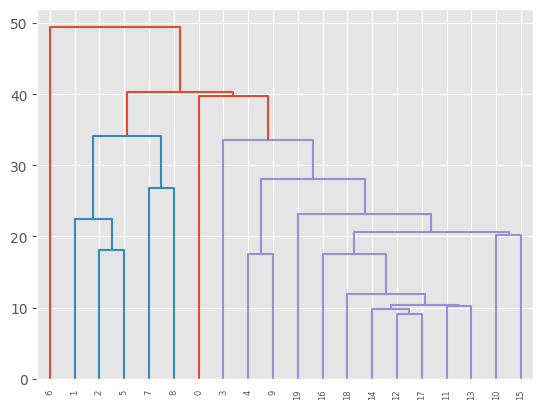

In [30]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

After understanding hierarchical clustering through dendograms, which visualize how clusters are merged at different heights (representing distances between clusters), we now move on to dimensionality reduction techniques like **Principal Component Analysis (PCA)** and **t-SNE**.

These methods are especially useful when dealing with high-dimensional datasets, where visualizing data or clustering becomes challenging due to the "curse of dimensionality." By reducing the number of features while preserving the structure and variance of the data, we can better understand the underlying patterns and even improve the performance of certain models.

Let's dive into these techniques:


<a id="15"></a> <br>
#### T-Distributed Stochastic Neighbor Embedding (T-SNE)

**T-Distributed Stochastic Neighbor Embedding (T-SNE)** is a powerful dimensionality reduction technique primarily used for visualizing high-dimensional data by mapping it to a lower-dimensional space (usually 2D or 3D). It is especially effective for creating visual representations of clusters in complex datasets.

Key concepts:

- **Learning Rate**: The learning rate in T-SNE typically ranges between 50 and 200. Adjusting the learning rate can influence the convergence and stability of the algorithm. Too small or too large a value may result in poor visualization.
  
- **Fit_transform**: Unlike some other algorithms, T-SNE has a single method called `fit_transform`, which both fits the model to the data and transforms the data into a lower-dimensional space in one step.

- **Relative Positioning**: T-SNE preserves the relative positioning of data points, ensuring that points which are close to each other in high-dimensional space remain close in the lower-dimensional embedding. This characteristic makes it excellent for visualizing groupings or patterns in data, such as clusters of similar varieties.

Although T-SNE is computationally intensive, it is highly effective for creating intuitive, visual representations of high-dimensional data, making it a popular tool for exploratory data analysis.


In [31]:
data2.columns

Index(['position_y', 'flange_radius'], dtype='object')

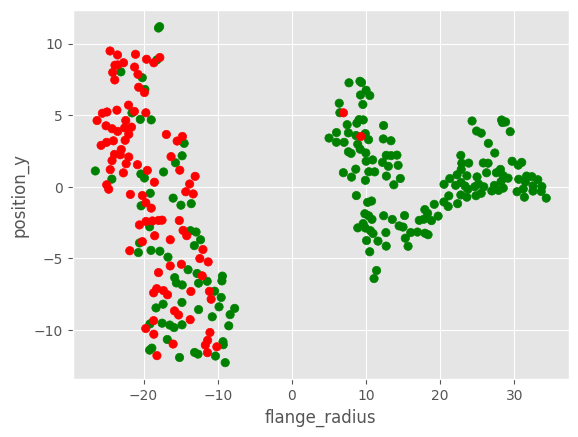

In [32]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('flange_radius')
plt.ylabel('position_y')
plt.show()

<a id="16"></a> <br>
#### Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a fundamental technique for dimensionality reduction, widely used to simplify complex datasets while retaining their most important features. PCA achieves this by transforming the data into a new coordinate system, where the axes (principal components) represent the directions of maximum variance.

Key concepts:

- **Decorrelation**: The first step in PCA is to decorrelate the data. This involves:
    - **Rotating the data** so that it aligns with the principal axes.
    - **Shifting the data** such that the new coordinates have a mean of zero (centering the data).
    - No information is lost during this process.
  
- **PCA Operations**:
    - `fit()`: The model learns how to shift and rotate the data to decorrelate it.
    - `transform()`: The learned transformation is applied to the dataset, and it can be used on both training and test data.
  
- **PCA Features**: The resulting PCA features are not linearly correlated, as the transformation ensures that each principal component represents a direction of maximum variance that is orthogonal to the others.

- **Principal Components**: These are the directions along which the variance in the data is maximized. By focusing on the principal components, PCA reduces the dimensionality of the data while retaining the most significant variance, making the dataset easier to analyze without substantial loss of information.

##### PCA vs T-Distributed Stochastic Neighbor Embedding (T-SNE)

While both PCA and T-SNE are techniques used for dimensionality reduction, they serve different purposes and operate on different principles:

1. **Objective**:
   - **PCA** focuses on retaining the directions of maximum variance in the data and is primarily used for feature extraction and noise reduction.
   - **T-SNE** emphasizes preserving the local structure of the data, making it ideal for visualizing high-dimensional data in two or three dimensions by clustering similar points together.

2. **Mechanism**:
   - **PCA** is a linear method that transforms the data into a lower-dimensional space based on linear combinations of the original features.
   - **T-SNE** is a non-linear technique that converts the high-dimensional Euclidean distances into conditional probabilities that represent similarities between data points, then optimizes these probabilities in the lower-dimensional space.

3. **Output**:
   - **PCA** can be used to reduce dimensionality while maintaining the overall structure of the data, producing principal components that are meaningful and interpretable.
   - **T-SNE**, on the other hand, often produces clusters in the lower-dimensional representation, making it less interpretable in terms of the original feature space but excellent for visual exploration.

In summary, while PCA is effective for dimensionality reduction in terms of variance and data interpretation, T-SNE excels in visualizing complex data structures and relationships. Each method has its strengths, and the choice between them depends on the specific goals of the analysis.


In [34]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = data
features = ['temperature', 'position_x', 'mean_clamping_force', 'slope_xy',
       'flange_radius', 'position_y']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['class'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

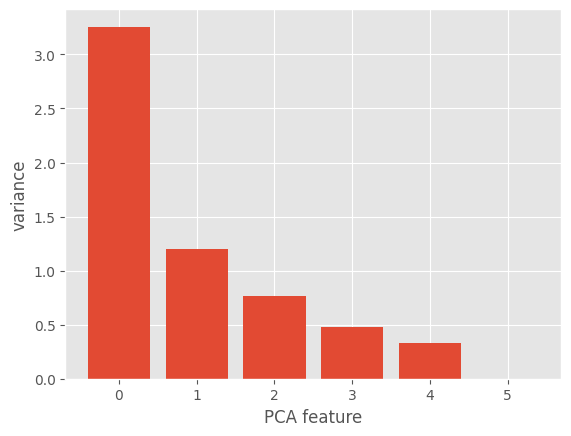

In [35]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()


1. **Higher variance in a principal component**: This means that the principal component explains more of the total variability in the dataset. PCA selects the directions (components) that capture the most variance first, so a component with higher variance is more significant in explaining the dataset’s structure.

2. **Retained components with higher variance**: Components with the highest variance are typically retained in dimensionality reduction, as they carry the most information. The idea is to capture as much variance as possible with fewer components while discarding those with lower variance, which are assumed to represent noise or less important variability.

3. **Variance explained ratio**: When looking at a PCA scree plot or cumulative explained variance, a component with higher variance will have a larger portion of the "explained variance ratio." This ratio helps determine how many components should be kept to preserve most of the dataset’s information.

In summary, in PCA, higher variance along a principal component indicates that this component is crucial for explaining the spread and structure of the data.


## 1.5 Reinforcement Learning (RL)

**Reinforcement Learning (RL)** is a subfield of machine learning focused on training agents to make sequences of decisions by interacting with an environment. The primary goal of reinforcement learning is to maximize cumulative rewards over time. It is characterized by its use of feedback from actions taken within an environment to learn optimal behaviors or policies.

![image](./images/rl.png)

### Key Concepts in Reinforcement Learning

#### 1.5.1 **Agent and Environment**
   - **Agent**: The learner or decision-maker that takes actions based on the current state of the environment.
   - **Environment**: The external system with which the agent interacts. The environment responds to the agent's actions and provides feedback.

#### 1.5.2 **State, Action, and Reward**
   - **State (s)**: A representation of the current situation of the agent in the environment.
   - **Action (a)**: A decision made by the agent that affects the state of the environment.
   - **Reward (r)**: A scalar feedback signal received after taking an action, indicating the immediate benefit or cost of that action.

#### 1.5.3 **Policy (π)**
   - A policy is a strategy that the agent employs to determine its actions based on the current state. It can be deterministic (a specific action for each state) or stochastic (a probability distribution over actions for each state).

#### 1.5.4 **Value Function (V)**
   - The value function estimates the expected cumulative reward that an agent can obtain from a given state, allowing the agent to evaluate the long-term benefit of being in that state.

#### 1.5.5 **Q-Function (Q)**
   - The Q-function, or action-value function, estimates the expected cumulative reward for taking a specific action in a particular state and following a given policy thereafter. It helps in determining the best action to take in a state.

#### 1.5.6 **Exploration vs. Exploitation**
   - A fundamental challenge in reinforcement learning is balancing exploration (trying new actions to discover their effects) and exploitation (choosing the best-known action based on current knowledge). Effective strategies often involve a combination of both.

#### 1.5.7 **Learning Algorithms**
   - Reinforcement learning encompasses various algorithms and approaches, including:
     - **Model-Free Methods**: Learn directly from interactions with the environment (e.g., Q-learning, Policy Gradient methods).
     - **Model-Based Methods**: Build a model of the environment to make predictions and optimize actions (e.g., Dynamic Programming).
     - **Deep Reinforcement Learning**: Combines deep learning with reinforcement learning to handle high-dimensional state spaces (e.g., using neural networks to approximate value functions).

#### Applications of Reinforcement Learning
Reinforcement learning has numerous applications, including:
- **Game Playing**: RL has been successfully applied in games like Chess, Go, and video games (e.g., AlphaGo, Dota 2).
- **Robotics**: Training robots to perform tasks through trial and error in simulated or real-world environments.
- **Autonomous Vehicles**: RL algorithms can be used for path planning and navigation in self-driving cars.
- **Recommendation Systems**: Learning user preferences to improve personalized content delivery.

---

## 1.6 Self-Supervised Learning (SSL)

**Self-Supervised Learning (SSL)** is a type of machine learning that creates supervisory signals from the data itself, without the need for labeled datasets. It has gained significant attention due to its ability to leverage vast amounts of unlabeled data, which is often easier and cheaper to obtain than labeled data.

### Key Concepts in Self-Supervised Learning

#### 1.6.1 **Pretext Tasks**
   - Self-supervised learning typically involves designing pretext tasks that allow the model to learn useful representations from unlabeled data. These tasks are constructed such that solving them requires the model to understand the underlying structure of the data. Common pretext tasks include:
     - **Image Colorization**: Predicting the color of grayscale images.
     - **Context Prediction**: Predicting the position of patches of an image.
     - **Contrastive Learning**: Learning to differentiate between similar and dissimilar pairs of samples.

#### 1.6.2 **Feature Learning**
   - The primary goal of SSL is to learn meaningful feature representations that can be transferred to downstream tasks, such as classification, detection, or segmentation. By training on pretext tasks, the model captures general patterns and structures in the data.

#### 1.6.3 **Contrastive Learning**
   - A popular approach in SSL is contrastive learning, where the model learns to maximize the similarity between positive pairs (e.g., augmented versions of the same image) and minimize the similarity between negative pairs (e.g., different images). This is often achieved through techniques like:
     - **Triplet Loss**: Involves anchor, positive, and negative examples to optimize distances in feature space.
     - **SimCLR**: A framework that leverages augmentations and a contrastive loss function to learn representations.

   ![image](./images/Contrastive-Learning.jpg)

#### 1.6.4 **Generative Models**
   - Some self-supervised methods use generative models to create labels from the data. For instance, Variational Autoencoders (VAEs) and Generative Adversarial Networks (GANs) can learn to generate data points that resemble the training data, capturing essential features in the process.

#### 1.6.5 **Applications of Self-Supervised Learning**
   - Self-supervised learning has shown great promise in various domains, including:
     - **Computer Vision**: Improving object recognition and segmentation tasks by pretraining models on large unlabeled datasets.
     - **Natural Language Processing**: Tasks like language modeling (e.g., BERT, GPT) leverage large text corpora to learn representations that are useful for downstream tasks like sentiment analysis or translation.
     - **Speech Recognition**: Learning representations from audio signals for speech-to-text applications.




## 1.7 Modalities (Quick Intro)

In data science, **modalities** refer to the different types of data used in machine learning and deep learning tasks. Some common data modalities include:

- **Tabular Data**: Structured data in rows and columns, commonly found in spreadsheets or databases. This is the most common data format for traditional ML models like decision trees, random forests, and gradient boosting.
- **Text Data**: Unstructured data in the form of text, such as articles, reviews, or social media posts. Natural Language Processing (NLP) techniques are used to handle this modality.
- **Image Data**: Pixel-based data that represents images. This data type is typically used in deep learning tasks such as image recognition or segmentation.
- **Time Series Data**: Data that consists of sequences of data points recorded at specific time intervals, often used in forecasting or anomaly detection tasks.

In this guide, we will focus on **tabular data**, which is ideal for many supervised learning tasks, such as classification and regression.

---

### 1.7.1 Tools for Tabular Data and Machine Learning/Deep Learning

When working with tabular data, there are several essential Python libraries that can be used to build machine learning and deep learning models. These include **Scikit-learn**, **PyTorch**, and **Optuna**.

#### 1.7.1.1 Scikit-learn (Sklearn)

**Scikit-learn** is one of the most popular and widely-used libraries for machine learning in Python. It provides simple and efficient tools for data analysis and modeling, particularly for working with tabular data.

##### Key Features:
- **Preprocessing**: Provides tools to clean and preprocess data, such as handling missing values, scaling data, and encoding categorical variables.
- **Supervised Learning Models**: Includes a wide range of algorithms for classification, regression, and clustering, such as decision trees, support vector machines, and k-means clustering.
- **Model Evaluation**: Offers evaluation metrics like accuracy, precision, recall, F1-score, and cross-validation.
- **Pipelines**: Facilitates combining multiple steps, such as preprocessing and modeling, into a single workflow to avoid data leakage.

Scikit-learn is particularly well-suited for tabular data and serves as a go-to library for quick and efficient model prototyping.

#### 1.7.1.2 PyTorch

**PyTorch** is a powerful library primarily used for deep learning. It is widely known for its flexibility, ease of use, and strong support for GPU acceleration. While it's often associated with image and text data, PyTorch can also be used effectively for deep learning models on tabular data.

##### Key Features:
- **Dynamic Computation Graphs**: PyTorch uses dynamic computation graphs, allowing you to change the way your neural network behaves on the fly.
- **Tensor Operations**: Similar to NumPy arrays, but optimized for GPU computations.
- **Autograd**: PyTorch automatically computes gradients, which is critical for the backpropagation algorithm used in training neural networks.
- **Neural Network Modules**: Offers pre-built layers, activation functions, and optimizers to help you construct deep learning models with ease.

Although traditionally associated with computer vision and NLP tasks, PyTorch's flexibility makes it well-suited for creating custom deep learning models on tabular data as well.

#### 1.7.1.3 Optuna

**Optuna** is a hyperparameter optimization framework that automates the process of finding the best hyperparameters for machine learning and deep learning models. It is particularly useful for tuning complex models and can greatly improve performance by finding optimal settings.

##### Key Features:
- **Define-by-run**: Unlike other optimization frameworks, Optuna allows you to define the hyperparameter search space dynamically as your code runs.
- **Pruning**: Optuna can stop trials that are unlikely to produce better results, saving time and computational resources.
- **Distributed Optimization**: Allows you to run optimization on multiple machines, speeding up the search for optimal hyperparameters.

Optuna can be integrated with libraries like Scikit-learn and PyTorch, making it an invaluable tool for hyperparameter tuning in machine learning and deep learning workflows.

---


## Overview
![image](./images/Bild3.png)

 
# 2. Ensemble Learning <a id= "1"></a>

Whenever we make any important decision we first discuss it with friends, family or an expert. Nowadays we check the reviews on social media or check a YouTube video. Considering other people's opinion just make final decision more informed and make sure to avoid any kind of surprises as we are combining multiple opinions about the same thing together. 

Ensemble modeling in machine learning operates on the same principle, where we combine the predictions from multiple models to generate the final model which provide better overall performance. Ensemble modeling helps to generalize the learning based on training data, so that it will be able to do predictions accurately on unknown data. 

Modeling is one of the most important step in machine learning pipeline. The main motivation behind ensemble learning is to correctly combine weak models to get a more accurate and robust model with bias-variance trade off. For example Random Forest algorithm is ensemble of Decision Tree and since it combine multiple decision  tree models it always perform better than single decision tree model.

Depending on how we combine the base models, ensemble learning can be classified in three different types Bagging, Boosting and  Stacking.

* **Bagging**: The working principle is to build several base models independently and then to average them for final predictions. 
* **Boosting**: Boosting models are built sequentially and tries to reduce the bias on final predictions. 
* **Stacking**: The predictions of each individual model are stacked together and used as input to a final estimator to compute the prediction. 
 
Ensemble learning approach makes the model more robust and helps to achieve the better performance.

In [38]:
# importing libraries 
from sklearn.ensemble import VotingClassifier ,BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from numpy import mean,std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.datasets import load_wine,load_iris
from matplotlib.pyplot import figure
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
import xgboost as xgb
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression,BayesianRidge,ElasticNet,Lasso,SGDRegressor,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,RobustScaler,StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin
from sklearn.svm import LinearSVR,SVR
#import xgboost 
from xgboost import XGBRegressor
#Import Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%matplotlib inline
seed = 1075
np.random.seed(seed)

<Figure size 1280x960 with 0 Axes>

In [42]:
!pip install hyperopt

  Using cached hyperopt-0.2.7-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
Using cached cloudpickle-3.1.0-py3-none-any.whl (22 kB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)


In [39]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

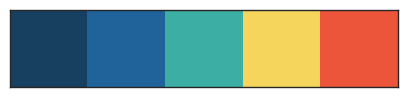

In [43]:
# Import the required packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib.ticker import FuncFormatter

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

import lightgbm as lgb

# Hyperparameter tuning
from hyperopt import fmin, rand, tpe, space_eval, STATUS_OK, Trials, hp
from hyperopt.pyll.stochastic import sample
# from bayes_opt import BayesianOptimization
# import optuna

sns.set_style("white")

### Define the colour scheme
c1 = "#173f5f"
c2 = "#20639b"
c3 = "#3caea3"
c4 = "#f6d55c"
c5 = "#ed553b"

custom_palette = [c1, c2, c3, c4, c5]
sns.palplot(sns.color_palette(custom_palette))

# User defined function
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#total'] = df.shape[0]
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    summ['#duplicates'] = summ['#total'] - summ['#unique']
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    return summ

**Import Data and Describe**

This dataset includes 199 numeric variables which include no missing values and are standardized. Therefore there is no data cleaning to perform before modelling. This dataset was choosen because the purpose of this notebook is to explote hyperparameter tuning in more detail.

In [44]:
# Import the data
df = pd.read_csv('./input/train.csv')
print("Shape of Data:\t", df.shape)

# View the data
summary(df.iloc[:, :13]).style.background_gradient(cmap='Blues')

Shape of Data:	 (200000, 202)


In [45]:
# Features and target
X = df.drop(['ID_code','target'], axis=1).copy()
y = df[['target']]

n_bads = df[df['target']==1].shape[0] 
print("Number of Bads:\t",n_bads)

# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=888)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

print("X_train Shape:\t", X_train.shape)
print("X_test Shape:\t", X_test.shape)
print("y_train Shape:\t", y_train.shape)
print("y_test Shape:\t", y_test.shape)

Number of Bads:	 20098
X_train Shape:	 (160000, 200)
X_test Shape:	 (40000, 200)
y_train Shape:	 (160000, 1)
y_test Shape:	 (40000, 1)


In [46]:
df['target']=df['target'].astype(np.uint8)

**Create a Small Sample for Testing**
Undersampling the `good` population so that there is a more balanced dataset for testing. This dataset is only used to visually show how the algorithms work without being too computationally expensive and without the need to balance the dataframe in a stistical way.

In [47]:
# Undersample goods
df_small_good = df[df['target']==0].sample(n = n_bads).copy()
df_small_bad = df[df['target']==1].copy()
df_small = pd.concat([df_small_good, df_small_bad], ignore_index=True, axis=0)

print(df_small.target.value_counts())

# Features and target
X = df_small.drop(['ID_code','target'], axis=1).copy()
y = df_small[['target']]

# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

print(" ")
print("X_train Shape:\t", X_train.shape)
print("X_test Shape:\t", X_test.shape)
print("y_train Shape:\t", y_train.shape)
print("y_test Shape:\t", y_test.shape)

target
0    20098
1    20098
Name: count, dtype: int64
 
X_train Shape:	 (32156, 200)
X_test Shape:	 (8040, 200)
y_train Shape:	 (32156, 1)
y_test Shape:	 (8040, 1)


## 2.1 Voting Classifier

The **Voting Classifier** is an ensemble learning technique that combines the predictions of multiple classifiers to improve overall performance and robustness. It supports two types of voting mechanisms:

### Hard Voting

In **hard voting**, the final predicted output class is determined by the class that receives the highest number of votes from the individual classifiers. Essentially, this method selects the class with the highest majority based on the predictions made by each classifier.

For example, consider three classifiers that predict the output classes as follows: 
- Classifier 1 predicts **A**
- Classifier 2 predicts **A**
- Classifier 3 predicts **B**

In this scenario, the majority vote is for class **A** (as two classifiers predicted A, while only one predicted B). Consequently, the final prediction made by the Voting Classifier would be **A**.

![Voting Classifier - Hard Voting](https://image.slidesharecdn.com/7-180514114334/95/ensemble-learning-and-random-forests-12-638.jpg?cb=1527755412)

![](https://image.slidesharecdn.com/7-180514114334/95/ensemble-learning-and-random-forests-12-638.jpg?cb=1527755412)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier( random_state=42)

voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('dt', dt_clf)],
    voting='hard')

In [49]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42))])

In [50]:
from sklearn.metrics import accuracy_score

for clf in (knn_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.5593283582089552
DecisionTreeClassifier 0.5839552238805971
VotingClassifier 0.5503731343283582


#### Why Does the Hard Voting Perform Worse?

In this case, **hard voting** results in an accuracy that is lower than both individual classifiers. This can happen when the models frequently disagree on predictions, and the majority vote does not always favor the correct class. Since hard voting does not take into account the confidence of the models, incorrect predictions may dominate when the classifiers are not well-aligned.

For instance, if **KNeighborsClassifier** and **DecisionTreeClassifier** often disagree on predictions, the final decision could reflect the weaker model's choices more frequently, reducing the overall accuracy.


### Soft Voting 

In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [51]:
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier( random_state=42)

voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('dt', dt_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [52]:
from sklearn.metrics import accuracy_score

for clf in (knn_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.5593283582089552


DecisionTreeClassifier 0.5839552238805971
VotingClassifier 0.5915422885572139


#### Why Does the Soft Voting Perform Better?

In soft voting, the **VotingClassifier** benefits from combining the predictions of both models. While each model may have its own weaknesses, averaging their probabilities allows the ensemble to make more balanced decisions. Even though the accuracy gain is small, it demonstrates that the **VotingClassifier** can slightly improve performance by leveraging the strengths of both models.

## 2.2 Bagging <a id= "2"></a>

![EnsembleI_Learning_Bagging](https://raw.githubusercontent.com/satishgunjal/images/master/Ensemble_Learning_Bagging.png)

* In bagging we build independent estimators on different samples of the original data set and average or vote across all the predictions.
* Bagging is a short form of **B*ootstrap *Agg*regat*ing*. It is an ensemble learning approach used to improve the stability and accuracy of machine learning algorithms.
* Since multiple model predictions are averaged together to form the final predictions, Bagging reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. 
* Bagging is a special case of the model averaging approach, in case of regression problem we take mean of the output and in case of classification we take the majority vote. 
* Bagging is more helpfull if we have over fitting (high variance) base models.
* We can also build independent estimators of same type on each subset. These independent estimators also enable us to parallelly process and increase the speed.
* Most popular bagging estimator is 'Bagging Tress' also knows as 'Random Forest'

### **Bootstrapping**
* It is a resampling technique, where large numbers of smaller samples of the same size are repeatedly drawn, with replacement, from a single original sample.
* So this technique will enable us to produce as many subsample as we required from the original training data.
* So the defination is simple to understand, but "replacement" word may be confusing sometimes. Here 'replacement' word signifies that the same obervation may repeat more than once in a given sample, and hence this technique is also known as **sampleing with replacement**

![Bootstrap_Sampling_ML](https://raw.githubusercontent.com/satishgunjal/images/master/Bootstrap_Sampling_ML.png)

* As you can see in above image we have training data with observations from X1 to X10. In first bootstrap training sample X6, X10 and X2 are repeated where as in second training sample X3, X4, X7 and X9 are repeated.
* Bootstrap sampling helps us to generate random sample from given training data for each model in order to genralise the final estimation.

So in case of Bagging we create multiple number of bootstrap samples from given data to train our base models. Each sample will contain training and test data sets which are different from each other and remember that training sample may contain duplicate observations.

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7513681592039801


In [54]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.5839552238805971


In this case, we used the **DecisionTreeClassifier** as the base model (also known as the "weak learner") in our **BaggingClassifier**. A single decision tree, while powerful, can often suffer from high variance, meaning it overfits to the training data and performs poorly on new, unseen data. This was reflected in the accuracy of the single decision tree model, which achieved a modest accuracy of **58.40%**. However, when we employed **bagging** (bootstrap aggregating) to create an ensemble of **500 decision trees**, each trained on random subsets of the data, the accuracy improved significantly to **75.14%**. This improvement highlights how bagging can combine the strengths of multiple weak learners, reducing their variance and stabilizing the overall model's performance. Even though the base model, a decision tree, is prone to overfitting, bagging helps mitigate this by leveraging multiple trees to generalize better, resulting in a more reliable and accurate prediction.


## 2.3 Boosting <a id= "3"></a>
* In case of boosting, machine learning models are used one after the other and the predictions made by first layer models are used as input to next layer models. The last layer of models will use the predictions from all previous layers to get the final predictions. 
* So boosting enables each subsequent model to boost the performance of the previous one by overcomming or reducing the error of the previous model.
* Unlike bagging, in case of boosting the base learners are trained in sequence on a weighted version of the data. Boosting is more helpful if we have biased base models.
* Boosting can be used to solve regression and classification problems.

![Ensemble_Learning_Boosting](https://raw.githubusercontent.com/satishgunjal/images/master/Ensemble_Learning_Boosting.png)

Different types of Boosting algorithms
* Gradient Boosting Machine (GBM)
* Extreme Gradient Boosting Machine (XGBM)
* LightGBM
* CatBoost

Gradient boosting

In [55]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [57]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [58]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [59]:
X_new = np.array([[0.8]])

In [60]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [61]:
y_pred

array([0.75026781])

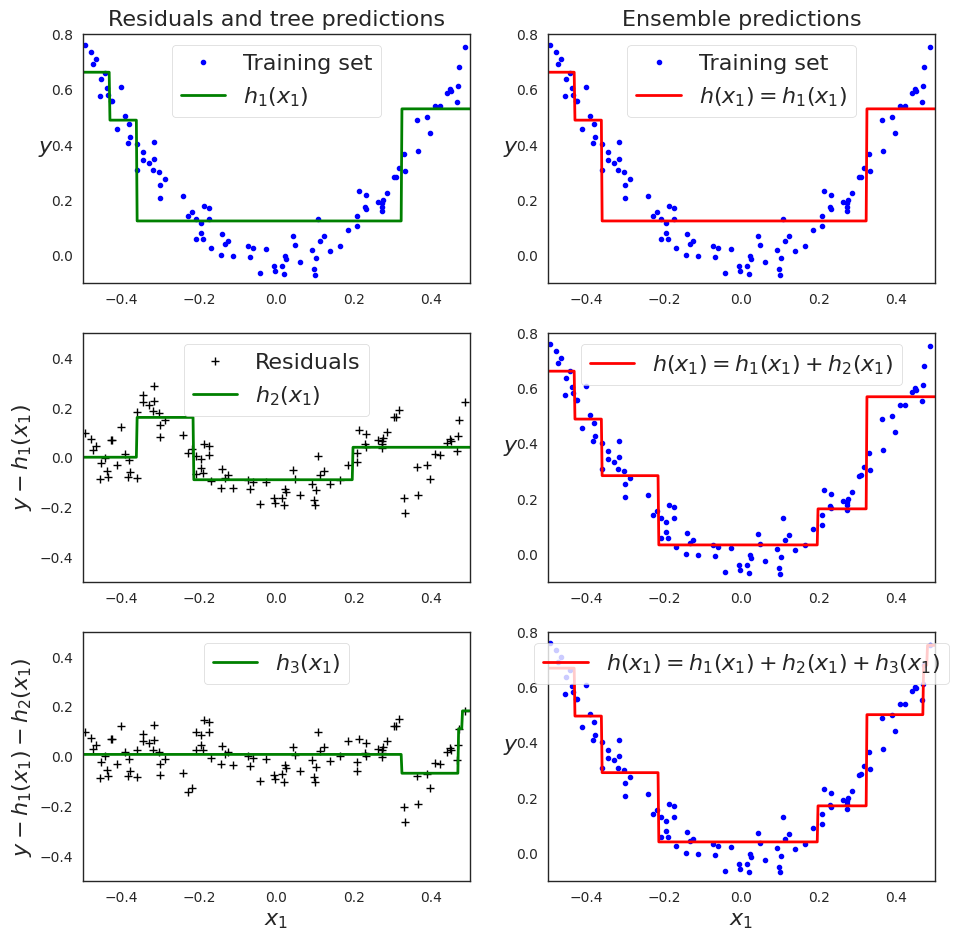

In [62]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

#
plt.show()

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [64]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In **gradient boosting algorithms**, two key hyperparameters that significantly influence the model’s performance are the **learning rate** and the **n_estimators** (number of trees). 

1. **Learning Rate**: The learning rate determines how much each new tree in the boosting process contributes to correcting the errors of the previous trees. A **smaller learning rate** (e.g., 0.01) makes the model learn more slowly, and each tree makes smaller adjustments. While this often leads to more accurate models, it typically requires a higher number of trees (n_estimators) to compensate for the slower learning process. On the other hand, a **larger learning rate** (e.g., 0.1 or higher) allows the model to learn faster, but can lead to overfitting if the adjustments made by each tree are too large and the model becomes too complex.

2. **n_estimators**: This parameter controls the number of trees in the ensemble. A **higher number of estimators** (trees) gives the model more opportunities to correct its mistakes and improve its performance, especially if the learning rate is low. However, if the number of trees is too high, the model may overfit, especially with a high learning rate. Conversely, if **n_estimators** is too low, the model might underfit because it doesn't have enough trees to capture the complexity of the data.

In practice, these two parameters often work in tandem: a **lower learning rate** generally requires a **higher number of trees** to maintain performance, while a **higher learning rate** needs fewer trees but runs the risk of overfitting. Fine-tuning these hyperparameters through cross-validation is essential to finding the right balance between underfitting and overfitting.


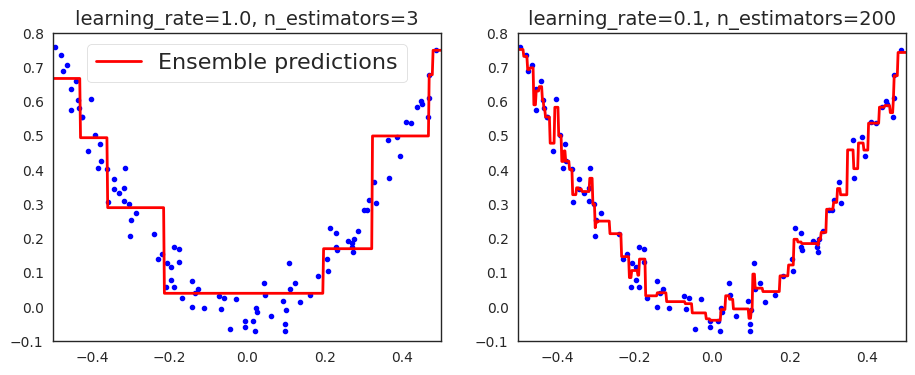

In [65]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

## 2.4 Stacking <a id= "4"></a>
Model stacking is a method for combining models to reduce their biases. The predictions of each individual model are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

Note that in case of stacking we use heterogeneous weak learners (different learning algorithms) but in case bagging and boosting we mainly use homogeneous weak learners. 

![Ensemble_Learning_Stacking](https://raw.githubusercontent.com/satishgunjal/images/master/Ensemble_Learning_Stacking.png)

In [66]:
from sklearn.ensemble import StackingClassifier

knn_clf = KNeighborsClassifier()
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
dt_clf = DecisionTreeClassifier( random_state=42)

SC = StackingClassifier(
    estimators=[('knn', knn_clf), ('rf', rnd_clf), ('dt', dt_clf)])


In [67]:
for clf in (knn_clf, rnd_clf, dt_clf, SC):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.5593283582089552


RandomForestClassifier 0.6380597014925373
DecisionTreeClassifier 0.5839552238805971
StackingClassifier 0.6577114427860696


## 2.5 When to use Ensemble Learning?
Since Ensemble learning results in better accuracy, high consistency and also helps to avoid bias variance tradeoff should'nt we use it everywhere? The short answer is it depends on the problem in hand. If our model with available training data is not performing well and showing the signs of overfitting/unterfitting and additinal compute power is not an issue then going for Ensemble Learning is best option. However one shouldnt skip the first steps of improving the input data and trying different hyperparmeters before going for ensemple approach. 


# 3. Deep Learning

Deep learning is a subset of machine learning that focuses on using **neural networks** to model complex patterns in data. Unlike traditional algorithms, which require manual feature extraction, deep learning automatically discovers features through multiple layers of representation. This ability to learn hierarchical representations makes deep learning particularly effective for tasks such as image recognition, natural language processing, and speech recognition.

## 3.1 The Architecture of Deep Learning Models

Deep learning models are typically organized into layers, forming a structure often referred to as a **deep neural network (DNN)**. The key components of a DNN include:

1. **Input Layer**: This layer receives the raw input data. Each neuron in the input layer represents a feature of the dataset.

2. **Hidden Layers**: These layers perform transformations on the data. A DNN can have multiple hidden layers, each containing a varying number of neurons. The more hidden layers a network has, the deeper it is considered. Hidden layers apply activation functions to introduce non-linearity, allowing the network to learn complex patterns.

3. **Output Layer**: This layer produces the final prediction. The number of neurons in the output layer corresponds to the number of classes in classification problems or a single neuron for regression tasks.

### 3.1.1 Single Neuron
A **single neuron** receives multiple inputs (x-values), processes them, and generates a predicted output (ŷ). Each input is weighted (w), and a **bias (b)** is added to the sum. The neuron applies a **non-linear activation function (g)** to this result, transforming the linear combination of inputs and weights into a non-linear output.

The activation function introduces complexity to the model, allowing it to capture more intricate patterns in the data.
![](https://miro.medium.com/max/1400/1*uj8zOKLfcsyba3wjqQeF3w.png)


#### Key Elements of a Neuron:
- **Weights (w)**: Strength of connection between inputs and neuron.
- **Bias (b)**: Shifts the activation function, allowing more flexibility in the model.
- **Activation Function (g)**: Introduces non-linearity to the network.



### 3.1.2 Layers

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/2MA4iMV.png" width="300" alt="A stack of three circles in an input layer connected to two circles in a dense layer.">
<figcaption style="textalign: center; font-style: italic"><center>A dense layer of two linear units receiving two inputs and a bias.
</center></figcaption>
</figure>

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.


### 3.1.3 The Activation Function #

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something *nonlinear*. What we need are activation functions.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/OLSUEYT.png" width="400" alt=" ">
<figcaption style="textalign: center; font-style: italic"><center>Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions. 
</center></figcaption>
</figure>

An **activation function** is simply some function we apply to each of a layer's outputs (its *activations*). The most common is the *rectifier* function $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/aeIyAlF.png" width="400" alt="A graph of the rectifier function. The line y=x when x>0 and y=0 when x<0, making a 'hinge' shape like '_/'.">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a *bend* in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".)  Applying a ReLU activation to a linear unit means the output becomes `max(0, w * x + b)`, which we might draw in a diagram like:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eFry7Yu.png" width="250" alt="Diagram of a single ReLU. Like a linear unit, but instead of a '+' symbol we now have a hinge '_/'. ">
<figcaption style="textalign: center; font-style: italic"><center>A rectified linear unit.
</center></figcaption>
</figure>

### 3.1.4 How do neural networks learn?

The learning process is about changing the values of the W and b parameters so that the loss function is minimized. In order to achieve this goal, we will turn for help to calculus and use gradient descent method to find a function minimum. In each iteration we will calculate the values of the loss function partial derivatives with respect to each of the parameters of our neural network. For those who are less familiar with this type of calculations, I will just mention that the derivative has a fantastic ability to describe the slope of the function. Thanks to that we know how to manipulate variables in order to move downhill in the graph. Aiming to form an intuition about how the gradient descent works (and stop you from falling asleep once again) I prepared a small visualization. You can see how with each successive epoch we are heading towards the minimum. In our NN it works in the same way — the gradient calculated on each iteration shows us the direction in which we should move. The main difference is that in our exemplary neural network, we have many more parameters to manipulate. Exactly… How to calculate such complex derivatives?

![](https://miro.medium.com/max/1152/1*KteGDjA9gflRcRcEThpy4w.gif)



### 3.1.5 Stacking Dense Layers 

Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Y5iwFQZ.png" width="450" alt="An input layer, two hidden layers, and a final linear layer.">
<figcaption style="textalign: center; font-style: italic"><center>A stack of dense layers makes a "fully-connected" network.
</center></figcaption>
</figure>

The layers before the output layer are sometimes called **hidden** since we never see their outputs directly.

Now, notice that the final (output) layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.

### 3.1.6 Building Sequential Models 

The `Sequential` model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:

In [68]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.model = nn.Sequential(
            # the hidden ReLU layers
            nn.Linear(2, 4),  # Input layer: input features=2, output features=4
            nn.ReLU(),
            nn.Linear(4, 3),  # Hidden layer: input features=4, output features=3
            nn.ReLU(),
            # the linear output layer
            nn.Linear(3, 1)   # Output layer: input features=3, output features=1
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = MyModel()


## Imports  <a class="anchor"  id="imports"></a>

In [61]:
%matplotlib inline

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate

In [12]:
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_contour

/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 4. Hyperparameter tuning

The general objective of Machine Learning algorithms is to minimize a loss function (e.g., the distance between two points) and to maximize a success metric (e.g., Mean Squared Error, Accuracy, Precision, etc.). A sample of a dataset with many variables is located on a point somewhere in a multidimensional space. Algorithms should find the optimal point in this space (e.g., the global minimum) where the loss function reaches its minimum value. 

In fact, to find a combination of hyperparameters that returns the best results is one of the greatest challenges in Machine Learning. Luckily, `scikit learn` and `pyspark` have built in functions for hyperparameter tuning ([`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [`pyspark.ml.tuning()`](https://spark.apache.org/docs/latest/ml-tuning.html)). 

TensorFlow in general, and Keras in particular, do not provide such a solution (to the best of my knowledge). Thus, it could be assumed that even the best performing Neural Network might return better outputs (i.e., the search space could be broader and might offer another minimum) with another combination of hyperparameters.



## 4.1 Introduction to Hyperparameter Tuning

### 4.1.1 Background

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to enhance its performance. Hyperparameters are configuration settings external to the model that influence its learning process, such as learning rates, regularization strengths, or the depth of a decision tree. 

Tuning these hyperparameters is essential because their values significantly impact the model's effectiveness. By systematically adjusting them, one can find the optimal combination that maximizes the model's accuracy, generalization, or other performance metrics. Effective hyperparameter tuning enables better predictive accuracy and robustness, ultimately improving the model’s ability to perform well on unseen data.

---

### 4.1.2 What are Hyperparameters?

Hyperparameters are parameters that are set before the model training begins. Unlike model parameters, which are learned during the training process, hyperparameters are external settings that define how the model learns. Examples include:

- Learning rate
- Regularization strength
- Depth of a decision tree

Hyperparameters must be chosen carefully, as they play a crucial role in the overall model performance.

---

### 4.1.3 Methods of Hyperparameter Tuning

There are three widely used methods for tuning hyperparameters:

1. **Grid search**: This method involves an exhaustive search through a manually specified subset of the hyperparameter space.
2. **Random search**: Randomly selects combinations of hyperparameters from a given range.
3. **Bayesian optimization**: Uses a probabilistic model to predict the best hyperparameters based on past iterations.

Grid search and random search are widely used methods in the Data Science community, but they come with limitations. 
- **Grid search** is both time-consuming and resource-intensive. 
- **Random search** is better in terms of speed and complexity but does not use any specific algorithm; it selects hyperparameters at random within a range.

The drawback of both techniques is that they don’t take into account previous iterations when searching for optimal hyperparameters. This is where **Bayesian optimization** excels. It finds relatively good hyperparameter combinations in fewer iterations by using a probabilistic model that considers the results from previous trials.
![ht](https://iili.io/JWdBWAb.png)
<div style="text-align: center"> <i>Image created by Liam Healy using FigJam</i></div>



### 4.1.4 Bayesian Optimization

#### What is Bayesian Optimization?

**Bayesian optimization** is a method for hyperparameter tuning that intelligently explores the hyperparameter space. Unlike grid and random search, Bayesian optimization uses a probabilistic surrogate model (like a Gaussian process) to approximate the objective function and predict which hyperparameter settings might yield better results. It dynamically adapts to previous trials, making the search more efficient.

The key benefit of Bayesian optimization is that it balances exploration (searching for new hyperparameter regions) and exploitation (refining promising regions), requiring fewer iterations to converge on the optimal hyperparameters.

#### Libraries Supporting Bayesian Optimization

There are plenty of libraries available to facilitate Bayesian optimization, among which **Optuna** stands out for its effectiveness and user-friendliness.

#### Why Use Optuna for Hyperparameter Tuning with Bayesian Optimization

Using **Optuna** for hyperparameter tuning is particularly beneficial due to its implementation of **Bayesian optimization**, which offers several key advantages over traditional methods like grid search or random search. Here’s a detailed explanation of why Optuna, leveraging Bayesian optimization, is a preferred choice for hyperparameter tuning:

- **Efficient Exploration of Hyperparameter Space**:  
  Bayesian optimization is designed to explore the hyperparameter space in a manner that prioritizes the most promising areas. By modeling the objective function (e.g., validation accuracy) probabilistically, Optuna can intelligently decide where to sample next, focusing on configurations that are likely to yield better performance.

- **Reduced Number of Evaluations**:  
  Traditional methods often require evaluating many hyperparameter combinations, leading to significant computational costs. Bayesian optimization, through its surrogate model and acquisition functions, can identify optimal or near-optimal configurations with fewer evaluations. This is particularly useful when training deep learning models, which are computationally expensive.

- **Handling Noisy Evaluations**:  
  Hyperparameter tuning in real-world scenarios may involve noisy evaluations due to factors like data variability. Bayesian optimization accommodates this noise by incorporating uncertainty into its predictions, allowing Optuna to make more informed decisions about which hyperparameters to test next.

- **Flexibility with Different Objective Functions**:  
  Optuna’s Bayesian optimization framework is flexible, allowing users to define custom objective functions for various metrics (e.g., F1 score, ROC AUC) or constraints (e.g., inference time), making it versatile for different tasks.

- **Incorporation of Prior Knowledge**:  
  Bayesian optimization can incorporate prior knowledge about the hyperparameter space. If certain hyperparameters have been shown to perform well in the past, Optuna can use this information to accelerate the tuning process.

- **Automatic Pruning of Trials**:  
  Optuna includes a pruning mechanism that terminates unpromising trials early based on intermediate results. This feature enhances efficiency by reallocating resources to more promising configurations.


## 4.2 Experimenting with Hyperparameter Tuning

This dataset consists of 520 observations and includes 17 features, all gathered from industrial machines through sensors and performance logs at a manufacturing plant. The early detection of machine faults and inefficiencies is critical to minimizing downtime and maintaining production efficiency. Many issues in industrial machinery can go undetected until they lead to major failures, making predictive maintenance essential. It is generally accepted that specific conditions or a combination of symptoms may indicate impending machine faults or inefficiencies. The features in this dataset provide information regarding the presence or absence of these operational issues. Machines flagged with faults are classified as class 1, while those operating normally are classified as class 0.

Upon loading the dataset, it is stored in the variable `pipeline_data`, and the initial rows of the dataset are subsequently displayed to provide an overview of its structure and contents.

In [76]:
pipeline_data = pd.read_csv("./input/pipeline_data.csv", sep = ";")
pipeline_data.head(3)

ID machine_type  temperature_fluctuation  vibration  unexpected_downtime  \
0  40        LILAC                        0          1                    0   
1  58        LILAC                        0          0                    0   
2  41        LILAC                        1          0                    0   

   power_drop  increased_output_demand  oil_leakage  sensor_malfunction  \
0           1                        0            0                   0   
1           1                        0            0                   1   
2           1                        1            0                   0   

   noise_level  operator_alerts  maintenance_delay  component_wear  \
0            1                0                  1               0   
1            0                0                  0               1   
2            1                0                  1               0   

   system_inefficiency  part_failure  overheating  class  
0                    1             1            1      1  
1                    0             1            0      1  
2                    1             1            0      1

### 1. Exploratory Data Analysis

The dataset consists of **520 entries** across **16 features**, with the **17th column** representing the target class. No missing values were found, and all features except for **machine type** are composed of integers.

Among the numeric features, all but **temperature fluctuation** are binary, indicating the presence (1, True) or absence (0, False) of a specific operational issue. The average temperature fluctuation recorded is slightly below 50 degrees, with an almost even distribution between lower fluctuations (0-50 degrees) and higher ones (50-100 degrees).

The dataset is imbalanced regarding machine status: **320 machines** are confirmed to have operational issues, while **200 are functioning normally**.

In terms of machine type, there are more **ADAK** than **LILAC** machines. The number of type A machines with and without operational issues is almost equal, but a slightly higher proportion of type B machines are confirmed to have operational issues compared to type A.

Try your hand at EDA.


### 2. Preprocess Data

All features are stored in `X`, and the label (class) in `y`.

In [77]:
X, y = pipeline_data.drop("class", axis = 1), pipeline_data[["class"]]

`machine_type` holds categorical values. Machine Learning algorithms and Neural Networks expect to process and compute numeric values. Therefore, the categorical feature is one-hot encoded (via `pd.get_dummies()`) (see the last 2 columns). It should be noted here that normalization is not necessary since all values are within the same range.


In [78]:
X = pd.get_dummies(X)
X.head(3)

ID  temperature_fluctuation  vibration  unexpected_downtime  power_drop  \
0  40                        0          1                    0           1   
1  58                        0          0                    0           1   
2  41                        1          0                    0           1   

   increased_output_demand  oil_leakage  sensor_malfunction  noise_level  \
0                        0            0                   0            1   
1                        0            0                   1            0   
2                        1            0                   0            1   

   operator_alerts  maintenance_delay  component_wear  system_inefficiency  \
0                0                  1               0                    1   
1                0                  0               1                    0   
2                0                  1               0                    1   

   part_failure  overheating  machine_type_ADAK  machine_type_LILAC  
0             1            1              False                True  
1             1            0              False                True  
2             1            0              False                True

### 3. Modelling <a class="anchor"  id="subsection4"></a>

#### 1. Predict class with default values of `GradientBoostingClassifier` <a class="anchor"  id="sub_sub1"></a>

Gradient Boosting Classifier builds an additive model in a forward stage-wise fashion. It allows for optimization of arbitrary differentiable loss functions. Gradient Boosting is a little bit powerful algorithm for diabetes dataset but for the sake of this exercise, I explore how `Optuna` looks into the defined search space to tune its hyperparameters.

Gradient Boosting is instantiated with its default values. The hyperparameters which values are tuned later, and their defaults are given below but explained later. 

- n_estimators = 100
- learning_rate = 0.1
- max_depth = 3
- subsample = 1.0
- max_features = None

In [79]:
gb_class = GradientBoostingClassifier(random_state = 42)

All samples are shuffled and split into 5 folds to be used for cross validation.

In [80]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

Due to the small number of samples (520), validation and test data should be set aside. Otherwise, the model would be trained on a much smaller number of samples (e.g. 418 if 80% are used for training). 

`cross_validate` is used to evaluate model performance during training, to avoid overfitting, and to monitor training. It accepts the Machine Learning algorithm, features, labels, number of folds to cross validate (on each iteration, one fold of random samples is withheld for validation), and an evaluation metric. 

*n_jobs* indicates the number of jobs to run in parallel. Training the estimator and computing the score are parallelized over the cross validation splits. A value set to -1 means that all available processors are used simultaneously for cross validation.

In [81]:
scores = cross_validate(gb_class, X, y, cv = kf, scoring = "accuracy", return_train_score = True, n_jobs = -1)

/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A colu

Gradient Boosting slightly overfits the data. Its accuracy on three folds reaches 100%. Nonetheless, its performance on validation samples is good as well – model accuracy ranges between 95% and 98%. Thus, the Base model's accuracy is exactly 97%.

In [82]:
scores

{'fit_time': array([0.07143664, 0.07264972, 0.07109165, 0.07187128, 0.07168818]),
 'score_time': array([0.00249243, 0.00229239, 0.00229192, 0.00243568, 0.00240397]),
 'test_score': array([0.97115385, 0.95192308, 0.97115385, 0.98076923, 0.98076923]),
 'train_score': array([1.        , 1.        , 0.99519231, 0.99759615, 1.        ])}

In [83]:
accuracy = scores['test_score'].mean()
print(f"Base Accuracy: {round(accuracy, 2) * 100}%.")

Base Accuracy: 97.0%.


#### 2. Tune `GradientBoostingClassifier` hyperparameters with `Optuna` <a class="anchor"  id="sub_sub2"></a>

`Optuna` is an automatic hyperparameter optimization software framework, designed for Machine Learning. It uses the terms *study* and *trial*.
The *trial* is a single execution of the objective function. It is a process of evaluating an objective function. On the other hand, a *study* is an optimization based on the objective function. It corresponds to an optimization task, i.e., a set of trials.

The objective function returns the value which should be optimized. In this case, this is the evaluation metric showing model accuracy. Arguments of the objective function are `Optuna`'s trial, features, labels, number of folds for cross validation, and scoring metrics.

The first thing to do in an objective function is to create a search space using built-in `Optuna` methods. For diabetes example, I create a (not so) small search space of Gradient Boosting hyperparameters.

The search space is a dictionary. trial object’s `suggest_*` functions are used to create possible values to search over. These functions require at least the hyperparameter name, minimum and maximum of the range to search over, or possible categories for categorical hyperparameters. To make the space smaller, suggest_float and suggest_int could have additional step or log arguments.

The hyperparameters and their min and max values are stored in a dictionary `params`. The objective function will look into the best combination of values of 5 hyperparameters:

- `n_estimators` (default = 100) shows the number of boosting stages to perform.

- the `learning_rate` (default = 0.1) shrinks the contribution of each tree by its value. There is a trade-off between learning_rate and n_estimators.

- `max_depth` (default = 3) shows the maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. 

- `subsample` (default = 1.0) defines the fraction of samples to be used for fitting the individual base learners.

- `max_features` (default=None) indicates the number of features to consider when looking for the best split. Possible values: *auto*, *sqrt*, *log2*.


In [84]:
def objective(trial, X, y, cv, scoring):
  """
  An objective function to tune hyperparameters of Gradient Boosting Classifier.
  Args:
    trial: an Optuna trial
    X: DataFrame object, features
    y: Series object, Labels
    cv: k folds to cross-validate
    scoring: String, evaluation metric
  Return:
    Mean test accuracy
  """

  params = {
    "n_estimators": trial.suggest_int("n_estimators", 100, 5000, step = 100),
    "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log = True),
    "max_depth": trial.suggest_int("max_depth", 3, 9),
    "subsample": trial.suggest_float("subsample", 0.5, 0.9, step = 0.1),
    "random_state": 42,
    }
  # Perform cross validation
  gb_class = GradientBoostingClassifier(**params)

  # Compute scores
  scores = cross_validate(gb_class, X, y, cv = cv, scoring = scoring, n_jobs = -1)
  accuracy = scores["test_score"].mean()

  return accuracy

`Optuna` study is created by calling `create_study()`. It works with its default settings (see [here](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.study.create_study.html#optuna.study.create_study)) save *direction*. The latter defines direction of optimization. In this case, accuracy should be *maximized*.

Cross validation is performed on 5 folds prepared by `KFold()`.

`func` passed to `study` gets all possible combinations to look over. The `objective` function creates an in-memory study.

In [85]:
study = optuna.create_study(direction = "maximize")

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

func = lambda trial: objective(trial, X, y, cv = kf, scoring = "accuracy")

[I 2024-12-12 15:36:30,194] A new study created in memory with name: no-name-942cc310-5965-4ca3-9268-23a3856f75aa


This function is optimized by calling `optimize` over the `study`. It accepts a callable (function) that implements the objective function.  *n_trials* define the number of optimization trials.

Running an optimization study returns the following artefacts for each trial:
- Trial number and if it was finished or not
- The optimized value (in this case, accuracy)
- A dictionary of parameters used in the trial to reach optimized value
- Best trial so far.

*Note: Kaggle Notebooks display warnings which were not raised in Colab. Nonetheless, all trials were passed successfully, regardless the excessive number of warnings*.

In [86]:
%%time
# Start optimizing with 10 trials
study.optimize(func, n_trials = 10)

/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A colu

/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saleetaqadir/Dokumente/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A colu

CPU times: user 110 ms, sys: 199 ms, total: 309 ms
Wall time: 42.6 s


The best trial in this study is No. 9. It reached 97.5% accuracy (higher than the Base value) with hyperparameters as shown below:

In [87]:
print(f"The highest accuracy reached by this study: {(study.best_value) * 100}%.")

The highest accuracy reached by this study: 97.11538461538461%.


In [88]:
print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Best params:
	n_estimators: 3300
	learning_rate: 0.06731420833829814
	max_depth: 7
	subsample: 0.5


#### 3.  Use visuals to get more insights

Visuals (e.g., plots, diagrams, tables) help for getting more and better insights into the data. 

**Plot optimization history**

`plot_optimization_history` plots optimization history of all trials in a study. The blue dots show accuracy on each trial, and the red line - the best value attained.

In [89]:
plot_optimization_history(study)

**Plot hyperparameters importance**

The code line below plots hyperparameters importances during optimization. In this case, number of estimators and the learning rate are the most important, followed by  trees maximum depth. Maximum features and subsample are not so important.

In [90]:
plot_param_importances(study)

**Plot contours**

The function below plots the parameter relationship as contour plot in a study. It should be borne in mind that if a parameter contains missing values, a trial with missing values is not plotted.

In [91]:
plot_contour(study)

To summarize, `Optuna` finds the combination of hyperparameters that returns the best performing model (similarly to `GridSearchCV()` of Scikit-learn). Its `visualization` module provides utility functions for plotting the optimization process using `plotly` and `matplotlib`. 

To optimize hyperparameters of Machine Learning algorithms looks a straightforward and not so complex task. However, tuning a Neural Network is much more time-consuming endeavour.

**Conclusion**


`Optuna` is an exceptional library for hyperparameter tuning, offering a more flexible and efficient approach compared to traditional methods like `GridSearchCV()` in scikit-learn. While `GridSearchCV()` is widely used for tuning hyperparameters, it lacks the adaptability and advanced optimization techniques that `Optuna` provides.

A significant advantage of `Optuna` is that it fills a gap not covered by frameworks like TensorFlow or Keras, which do not natively provide advanced hyperparameter tuning functionality. This makes finding the optimal neural network architecture and parameters with `Optuna` less painful and more time-efficient.

However, one area for further exploration is the tuning of hyperparameters across multiple layers of a neural network. Currently, while `Optuna` efficiently tunes individual layer parameters, optimizing the number and types of layers in a network remains a challenging task, as `Optuna` doesn't offer direct functions for this yet. Further research could uncover more efficient methods to optimize entire neural network architectures using `Optuna`.

In summary, `Optuna` is an excellent tool for hyperparameter tuning and has the potential for even broader applications in neural network optimization with continued exploration.
